# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Muhamad Syarif Fakhrezi
- Email: ms.fakhrezi@gmail.com
- Id Dicoding: muhamadsyarif

##Cakupan Proyek

Mendeteksi siswa yang mungkin akan melakukan dropout dengan melakukan beberapa langkah sebagai berikut:
* Mengidentifikasi berbagai faktor yang mempengaruhi tingginya tingkat dropout.
* Membuat model machine learning untuk memprediksi dropout atau tidaknya siswa dengan menginput beberapa data mengenai siswa tersebut, model ini akan dideploy dengan menggunakan streamlit.
* Membuat business dashboard untuk membantu memonitori berbagai faktor tersebut.

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

### Data Description

In [ ]:
response = requests.get('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/README.md')

if response.status_code == 200:
  isi_file = response.text
  print(isi_file)
else:
  print("Gagal menampilkan file:", response.status_code)

# Students' Performance

A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess.

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7

### Data Wrangling

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv', sep=';')
pd.set_option('display.max_columns', None)
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Jika diperhatikan pada dataset terdapat kolom/feature yang tidak berkaitan dengan konteks pada proyek kali ini, beberapa kolom tersebut antara lain: Unemployment_rate, Inflation_rate, dan	GDP. Ini didukung juga dengan deskripsi data yang dituliskan oleh pemilik/pembuat dataset yang mana tidak terdapat ketiga kolom tersebut, oleh karena itu kolom-kolom tadi akan kita hapus.

In [ ]:
df = df.drop(columns=['Unemployment_rate', 'Inflation_rate', 'GDP'], axis=1)

In [ ]:
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dapat dilihat pada output di atas bahwa nilai 'non-null' pada setiap kolom memiliki jumlah yang sama dengan nilai 'entries', ini menunjukkan bahwa tidak terdapat nilai yang kosong/null. Setiap kolom juga telah memiliki tipe data yang sesuai.

In [ ]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,NaN


Setelah diidentifikasi, tidak terdapat keanehan pada data dan nilai pada setiap kolomnya sudah sesuai.

Sebelum ke tahap EDA, kita perlu melakukan decoding pada data kategorikal agar memudahkan dalam manganalisis data.

In [ ]:
categorical = ['Marital_status', 'Application_mode', 'Course', 'Previous_qualification',  'Nacionality', 'Mothers_qualification', 'Fathers_qualification',
               'Mothers_occupation', 'Fathers_occupation']

Fitur kategorikal yang bernilai biner(hanya terdapat 2 nilai) dan telah diencoding, akan digabungkan dengan fitur numerikal untuk dilakukan analisis korelasi dengan heatmap.

In [ ]:
bin_cat = ['Daytime_evening_attendance', 'Educational_special_needs', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']

In [ ]:
print(df[categorical].nunique())
for i in categorical:
  print(i, df[i].unique())

Marital_status             6
Application_mode          18
Course                    17
Previous_qualification    17
Nacionality               21
Mothers_qualification     29
Fathers_qualification     34
Mothers_occupation        32
Fathers_occupation        46
dtype: int64
Marital_status [1 2 4 3 5 6]
Application_mode [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Course [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Previous_qualification [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Nacionality [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
Mothers_qualification [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
Fathers_qualification [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31]
Mothers_occupation [  5   3   9   7   4   1 125   0   6   2  90   8 141 175  99 191 151 194
 192 132 152 134  10 14

In [ ]:
df.replace({
    'Marital_status':
     {1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'},
    'Application_mode':
     {1: '1st phase - general contingent', 2: 'Ordinance No. 612/93', 5: '1st phase - special contingent (Azores Island)', 7: 'Holders of other higher courses',
      10: 'Ordinance No. 854-B/99', 15: 'International student (bachelor)', 16: '1st phase - special contingent (Madeira Island)',
      17: '2nd phase - general contingent', 18: '3rd phase - general contingent', 26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
      27: 'Ordinance No. 533-A/99, item b3 (Other Institution)', 39: 'Over 23 years old', 42: 'Transfer', 43: 'Change of course',
      44: 'Technological specialization diploma holders', 51: 'Change of institution/course', 53: 'Short cycle diploma holders',
      57: 'Change of institution/course (International)',},
    'Course':
     {33: 'Biofuel Production Technologies', 171: 'Animation and Multimedia Design', 8014: 'Social Service (evening attendance)', 9003: 'Agronomy',
      9070: 'Communication Design', 9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130: 'Equinculture', 9147: 'Management',
      9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing', 9556: 'Oral Hygiene', 9670: 'Advertising and Marketing Management',
      9773: 'Journalism and Communication', 9853: 'Basic Education', 9991: 'Management (evening attendance)'},
    'Previous_qualification':
     {1: 'Secondary education', 2: 'Higher education - bachelor\'s degree', 3: 'Higher education - degree', 4: 'Higher education - master\'s',
      5: 'Higher education - doctorate', 6: 'Frequency of higher education', 9: '12th year of schooling - not completed', 10: '11th year of schooling - not completed',
      12: 'Other - 11th year of schooling', 14: '10th year of schooling', 15: '10th year of schooling - not completed', 19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
      38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.', 39: 'Technological specialization course', 40: 'Higher education - degree (1st cycle)',
      42: 'Professional higher technical course', 43: 'Higher education - master (2nd cycle)'},
    'Nacionality':
     {1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
      24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)', 101: 'Mexican',
      103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'},
    'Mothers_qualification':
     {1: 'Secondary Education - 12th Year of Schooling or Eq.', 2: 'Higher Education - Bachelor\'s Degree', 3: 'Higher Education', 4: 'Higher Education - Master\'s',
      5: 'Higher education - doctorate', 6: 'Frequency of higher education', 9: '12th year of schooling - not completed', 10: '11th year of schooling - not completed',
      11: '7th Year (Old)', 12: 'Other - 11th year of schooling', 13: '2nd year complementary high school course', 14: '10th Year of Schooling', 18: 'General commerce course',
      19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 20: 'Complementary High School Course', 22: 'Technical-professional course',
      25: 'Complementary High School Course - not concluded', 26: '7th year of schooling', 27: '2nd cycle of the general high school course',
      29: '9th Year of Schooling - Not Completed', 30: '8th year of schooling', 31: 'General Course of Administration and Commerce',
      33: 'Supplementary Accounting and Administration', 34: 'Unknown', 35: 'Can\'t read or write', 36: 'Can read without having a 4th year of schooling',
      37: 'Basic education 1st cycle (4th/5th year) or equiv.', 38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 39: 'Technological specialization course',
      40: 'Higher education - degree (1st cycle)', 41: 'Specialized higher studies course', 42: 'Professional higher technical course',
      43: 'Higher Education - Master (2nd cycle)', 44: 'Higher Education - Doctorate (3rd cycle)'},
    'Fathers_qualification':
     {1: 'Secondary Education - 12th Year of Schooling or Eq.', 2: 'Higher Education - Bachelor\'s Degree', 3: 'Higher Education', 4: 'Higher Education - Master\'s',
      5: 'Higher education - doctorate', 6: 'Frequency of higher education', 9: '12th year of schooling - not completed', 10: '11th year of schooling - not completed',
      11: '7th Year (Old)', 12: 'Other - 11th year of schooling', 13: '2nd year complementary high school course', 14: '10th Year of Schooling', 18: 'General commerce course',
      19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 20: 'Complementary High School Course', 22: 'Technical-professional course',
      25: 'Complementary High School Course - not concluded', 26: '7th year of schooling', 27: '2nd cycle of the general high school course',
      29: '9th Year of Schooling - Not Completed', 30: '8th year of schooling', 31: 'General Course of Administration and Commerce',
      33: 'Supplementary Accounting and Administration', 34: 'Unknown', 35: 'Can\'t read or write', 36: 'Can read without having a 4th year of schooling',
      37: 'Basic education 1st cycle (4th/5th year) or equiv.', 38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 39: 'Technological specialization course',
      40: 'Higher education - degree (1st cycle)', 41: 'Specialized higher studies course', 42: 'Professional higher technical course',
      43: 'Higher Education - Master (2nd cycle)', 44: 'Higher Education - Doctorate (3rd cycle)'},
    'Mothers_occupation':
     {0: 'Student', 1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
      2: 'Specialists in Intellectual and Scientific Activities', 3: 'Intermediate Level Technicians and Professions', 4: 'Administrative staff',
      5: 'Personal Services, Security and Safety Workers and Sellers', 6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
      7: 'Skilled Workers in Industry, Construction and Craftsmen', 8: 'Installation and Machine Operators and Assembly Workers', 9: 'Unskilled Workers',
      10: 'Armed Forces Professions', 90: 'Other Situation', 99: '(blank)', 122: 'Health professionals', 123: 'teachers', 125: 'Specialists in information and communication technologies (ICT)',
      131: 'Intermediate level science and engineering technicians and professions', 132: 'Technicians and professionals, of intermediate level of health',
      134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 141: 'Office workers, secretaries in general and data processing operators',
      143: 'Data, accounting, statistical, financial services and registry-related operators', 144: 'Other administrative support staff', 151: 'personal service workers',
      152: 'sellers', 153: 'Personal care workers and the like', 171: 'Skilled construction workers and the like, except electricians',
      173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
      175: 'Workers in food processing, woodworking, clothing and other industries and crafts', 191: 'cleaning workers', 192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
      193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 194: 'Meal preparation assistants'},
    'Fathers_occupation':
     {0: 'Student', 1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
      2: 'Specialists in Intellectual and Scientific Activities', 3: 'Intermediate Level Technicians and Professions', 4: 'Administrative staff',
      5: 'Personal Services, Security and Safety Workers and Sellers', 6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
      7: 'Skilled Workers in Industry, Construction and Craftsmen', 8: 'Installation and Machine Operators and Assembly Workers', 9: 'Unskilled Workers',
      10: 'Armed Forces Professions', 90: 'Other Situation', 99: '(blank)', 101: 'Armed Forces Officers', 102: 'Armed Forces Sergeants', 103: 'Other Armed Forces personnel',
      112: 'Directors of administrative and commercial services', 114: 'Hotel, catering, trade and other services directors',
      121: 'Specialists in the physical sciences, mathematics, engineering and related techniques', 122: 'Health professionals', 123: 'teachers',
      124: 'Specialists in finance, accounting, administrative organization, public and commercial relations', 131: 'Intermediate level science and engineering technicians and professions',
      132: 'Technicians and professionals, of intermediate level of health', 134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
      135: 'Information and communication technology technicians', 141: 'Office workers, secretaries in general and data processing operators',
      143: 'Data, accounting, statistical, financial services and registry-related operators', 144: 'Other administrative support staff', 151: 'personal service workers', \
      152: 'sellers', 153: 'Personal care workers and the like', 154: 'Protection and security services personnel', 161: 'Market-oriented farmers and skilled agricultural and animal production workers',
      163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence', 171: 'Skilled construction workers and the like, except electricians',
      172: 'Skilled workers in metallurgy, metalworking and similar', 174: 'Skilled workers in electricity and electronics',
      175: 'Workers in food processing, woodworking, clothing and other industries and crafts', 181: 'Fixed plant and machine operators',
      182: 'assembly workers', 183: 'Vehicle drivers and mobile equipment operators', 192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
      193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 194: 'Meal preparation assistants',
      195: 'Street vendors (except food) and street service providers'}
    },
               inplace=True)

In [ ]:
print(df[categorical].nunique())
for i in categorical:
  print(i, df[i].unique())

Marital_status             6
Application_mode          18
Course                    17
Previous_qualification    17
Nacionality               21
Mothers_qualification     29
Fathers_qualification     34
Mothers_occupation        32
Fathers_occupation        46
dtype: int64
Marital_status ['single' 'married' 'divorced' 'widower' 'facto union' 'legally separated']
Application_mode ['2nd phase - general contingent' 'International student (bachelor)'
 '1st phase - general contingent' 'Over 23 years old'
 '3rd phase - general contingent' 'Short cycle diploma holders'
 'Technological specialization diploma holders'
 'Change of institution/course' 'Change of course'
 'Holders of other higher courses' 'Transfer'
 '1st phase - special contingent (Madeira Island)'
 '1st phase - special contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of institution/course (International)'
 'Ordinance No. 533-A/99, item b2) (Different Plan)'
 'Ordinance No. 533-A/99, item b3 (O

In [ ]:
df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Kita asumsikan siswa yang berstatus 'Enrolled' adalah siswa yang masih aktif (tidak dropout hingga saat ini dan belum lulus). Mengingat tujuan proyek ini untuk mengidentifikasi/memprediksi dropout atau tidaknya siswa, maka siswa yang berstatus 'Enrolled' akan kita hapus dan nantinya akan kita gunakan untuk diprediksi menggunakan model yang telah kita latih.

In [ ]:
eda_df = df.drop(df[df['Status']=='Enrolled'].index)

In [ ]:
eda_df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64

Selain melakukan decoding data kategorikal, kita juga akan membuat kolom Graduate yang berisi nilai dari kolom Status yang diencoding untuk digunakan pada analisis korelasi dan modeling.

In [ ]:
!mkdir -p /content/model

y_encoder = LabelEncoder()
eda_df['Graduate'] = eda_df['Status']
eda_df['Graduate'] = y_encoder.fit_transform(eda_df['Graduate'])
joblib.dump(y_encoder, "/content/model/y_encoder.joblib")

eda_df['Graduate'].value_counts()

Graduate
1    2209
0    1421
Name: count, dtype: int64

Kode diatas menghasilkan nilai pada kolom Graduate yang diambil dari kolom Status dan dirubah menjadi numerical data, nilai 1 untuk siswa berstatus 'Graduate', dan 0 yang berstatus 'Dropout'.

### EDA

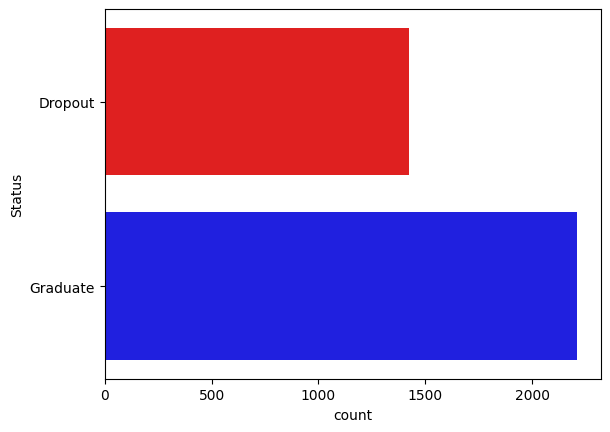

In [ ]:
sns.countplot(data=eda_df, y='Status', hue='Status', palette=['Red', 'Blue'])
plt.show()

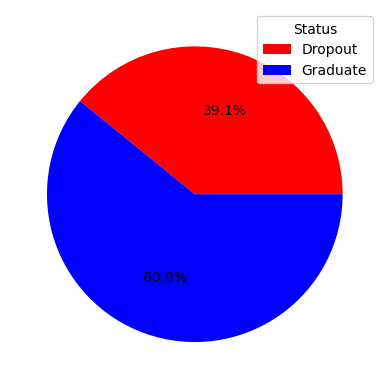

In [ ]:
plt.pie(eda_df.groupby('Status').Status.count(), autopct='%.1f%%', colors=['Red', 'Blue'])
plt.legend(['Dropout', 'Graduate'], title='Status')
plt.show()

#### Distribusi Data Categorical

<Axes: xlabel='count', ylabel='Status'>

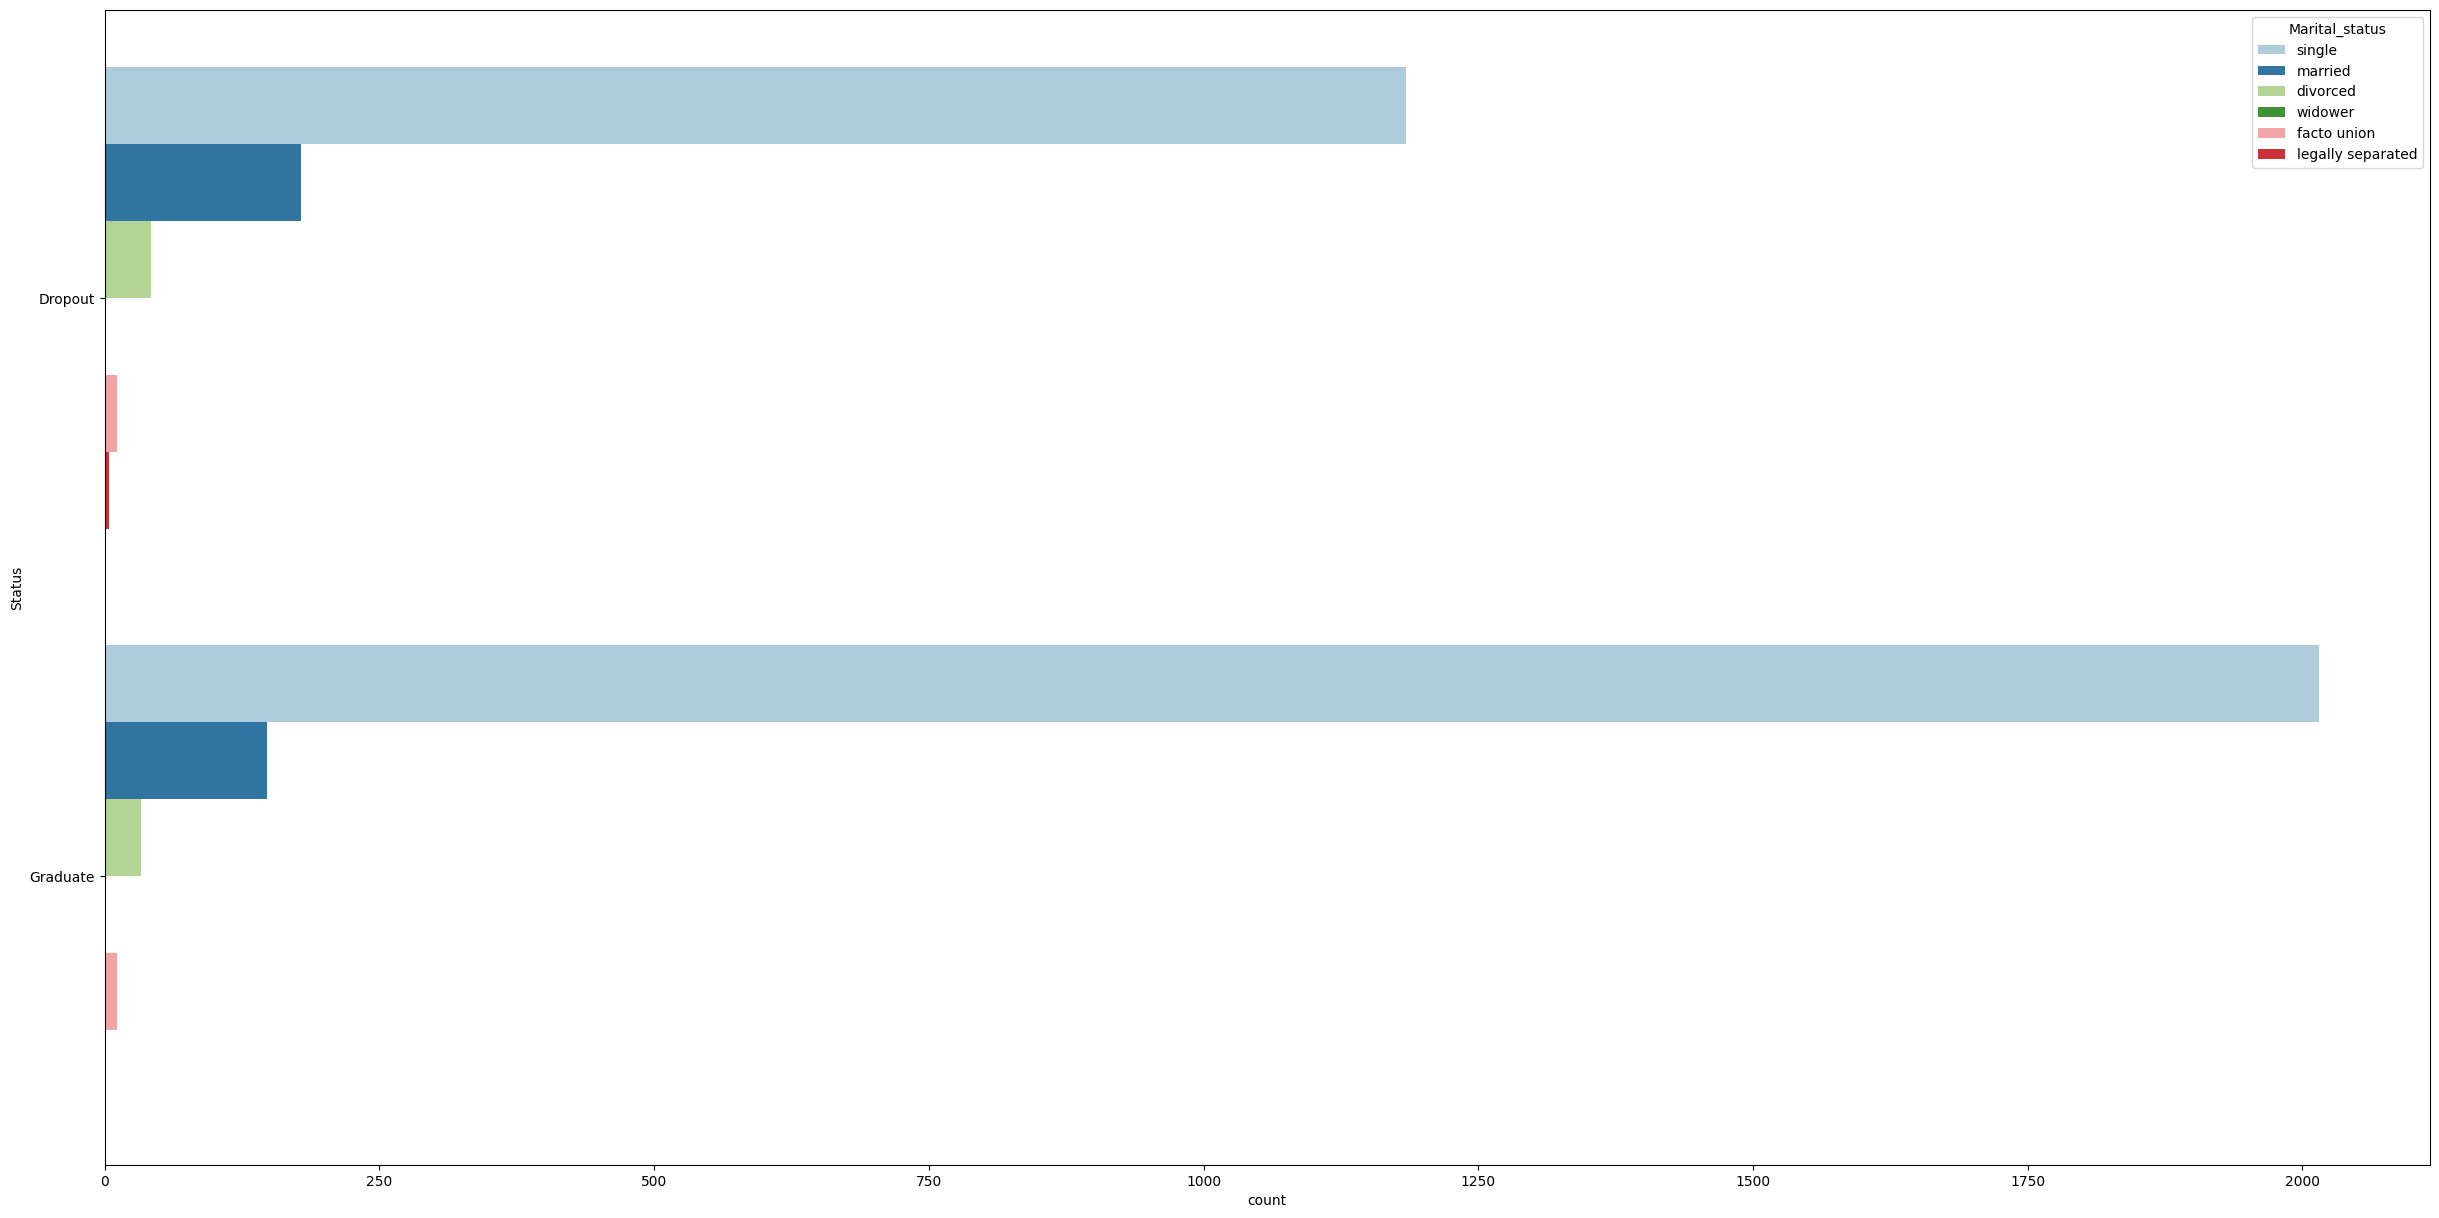

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[0], palette='Paired')

<Axes: xlabel='count', ylabel='Status'>

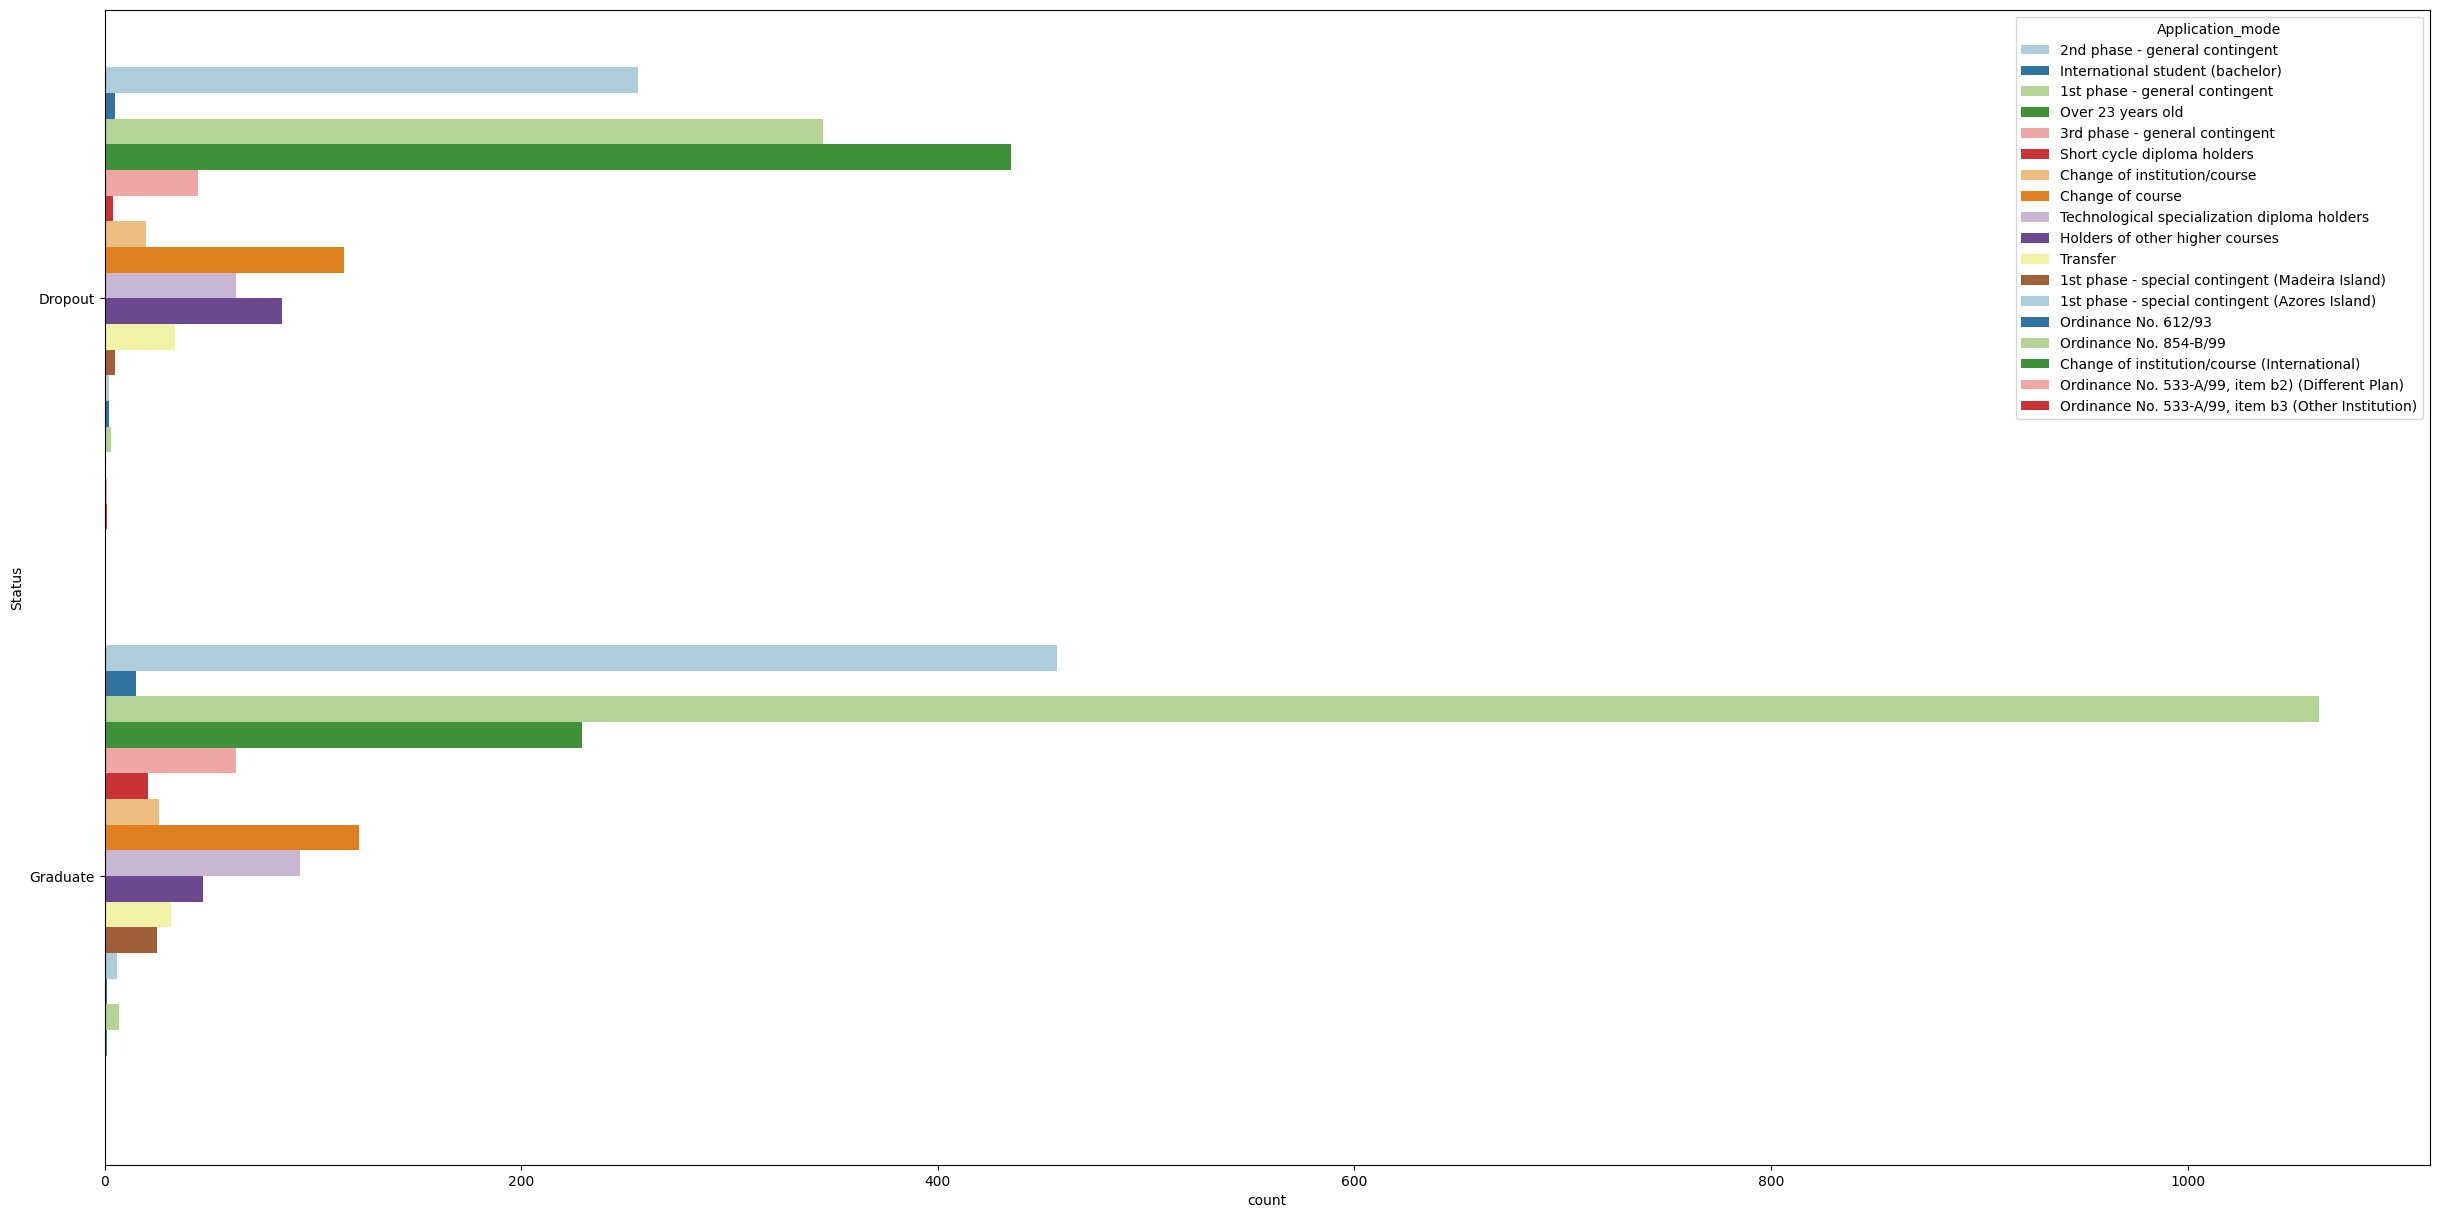

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[1], palette='Paired')

<Axes: xlabel='count', ylabel='Status'>

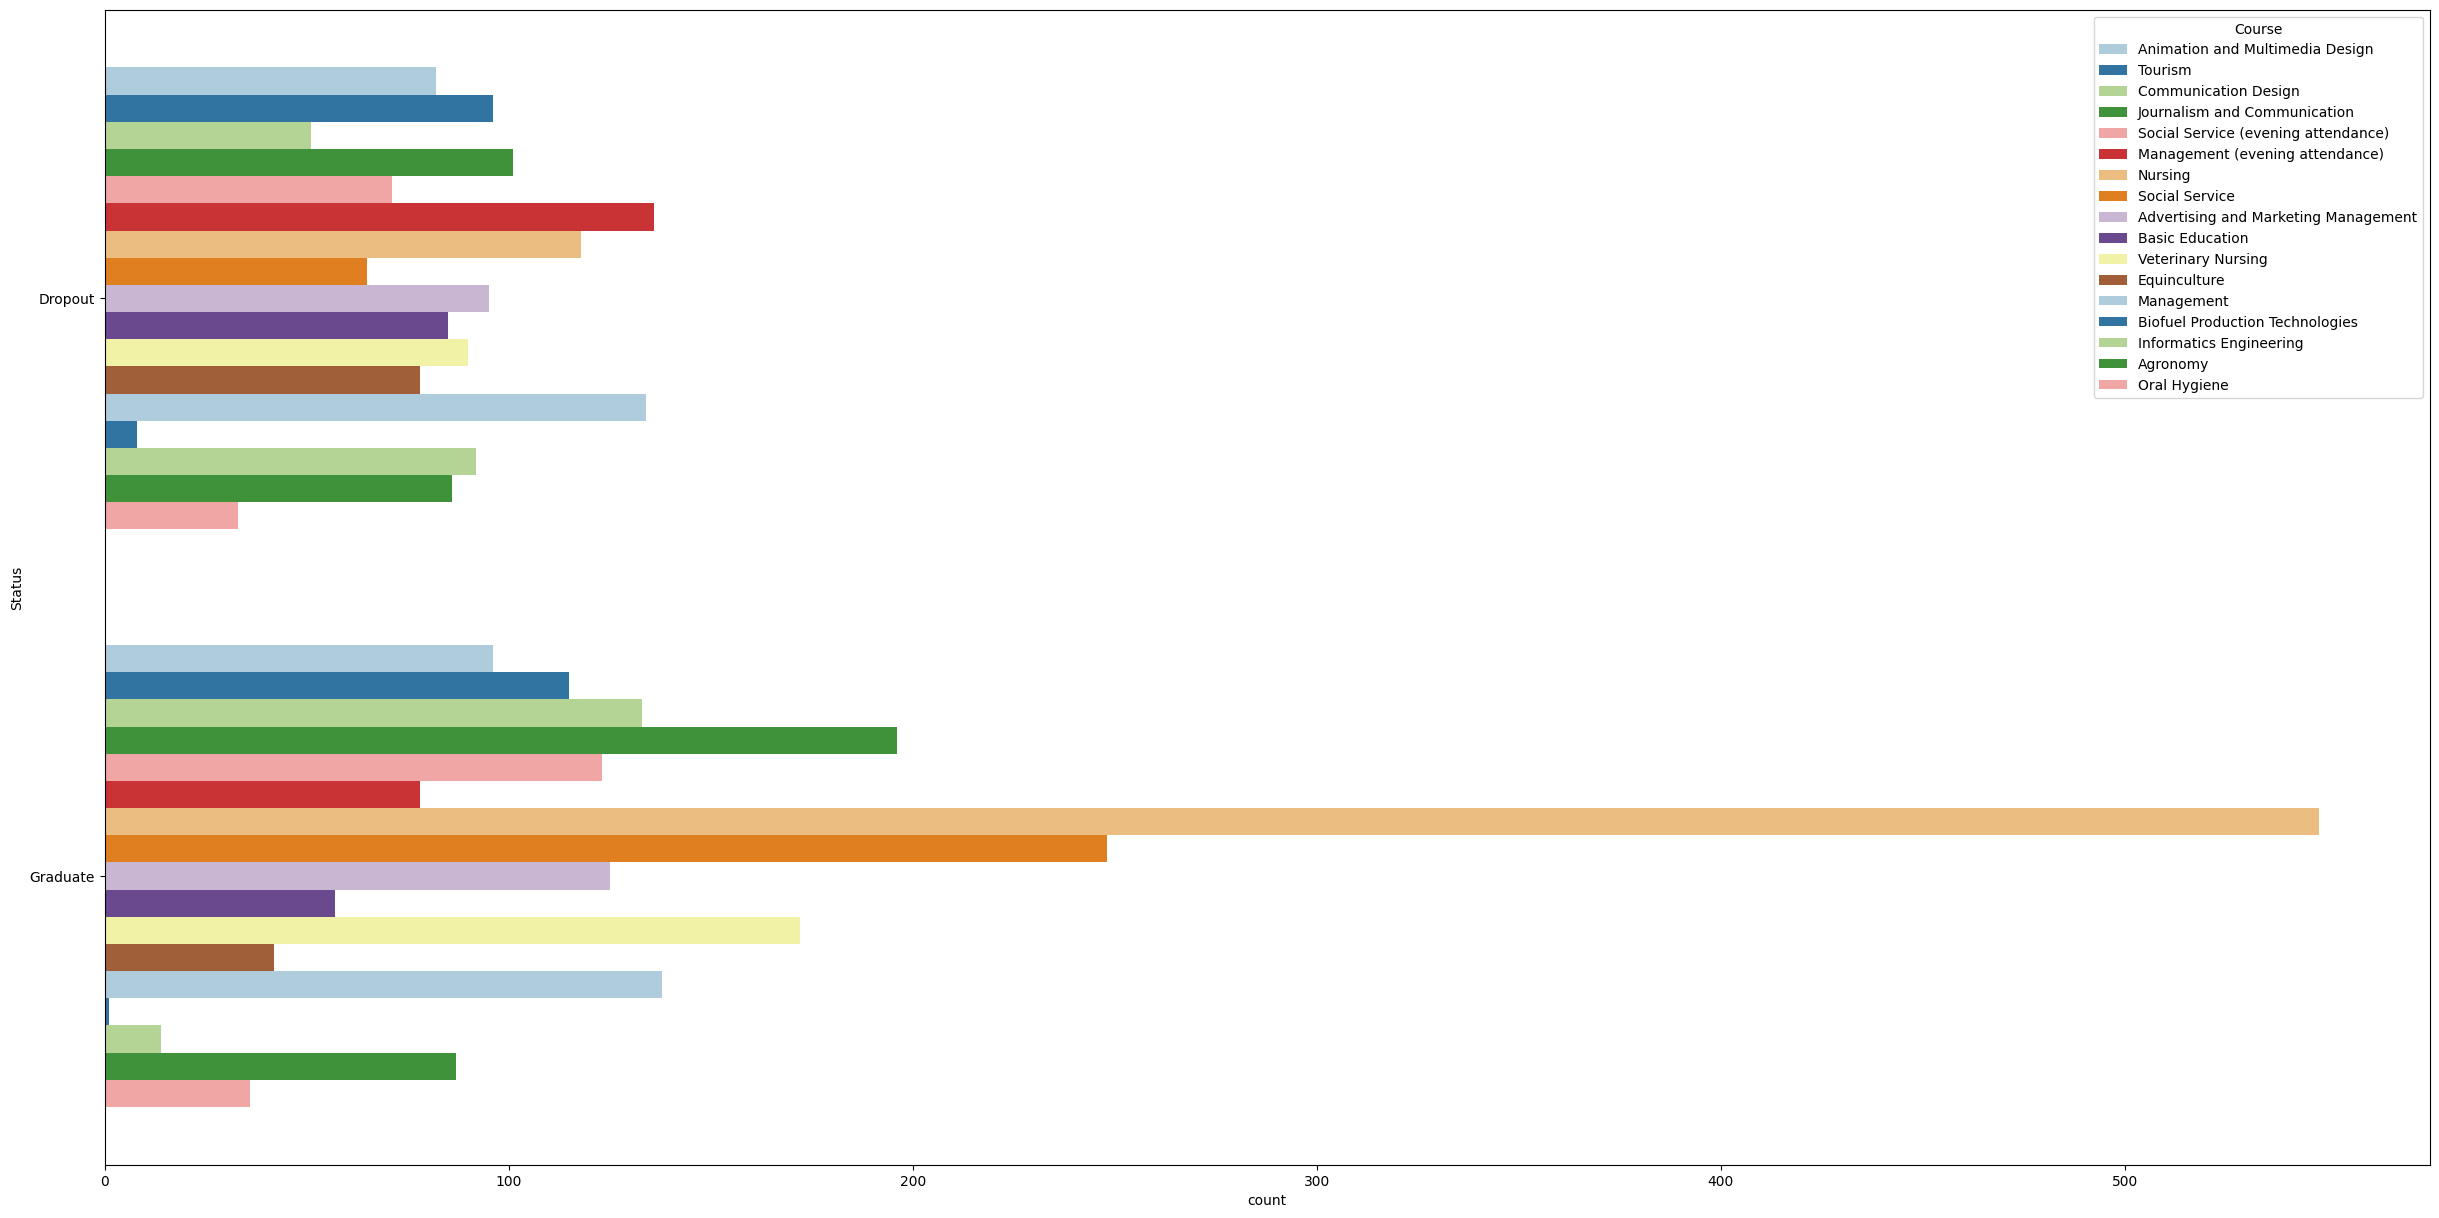

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[2], palette='Paired')

<Axes: xlabel='count', ylabel='Status'>

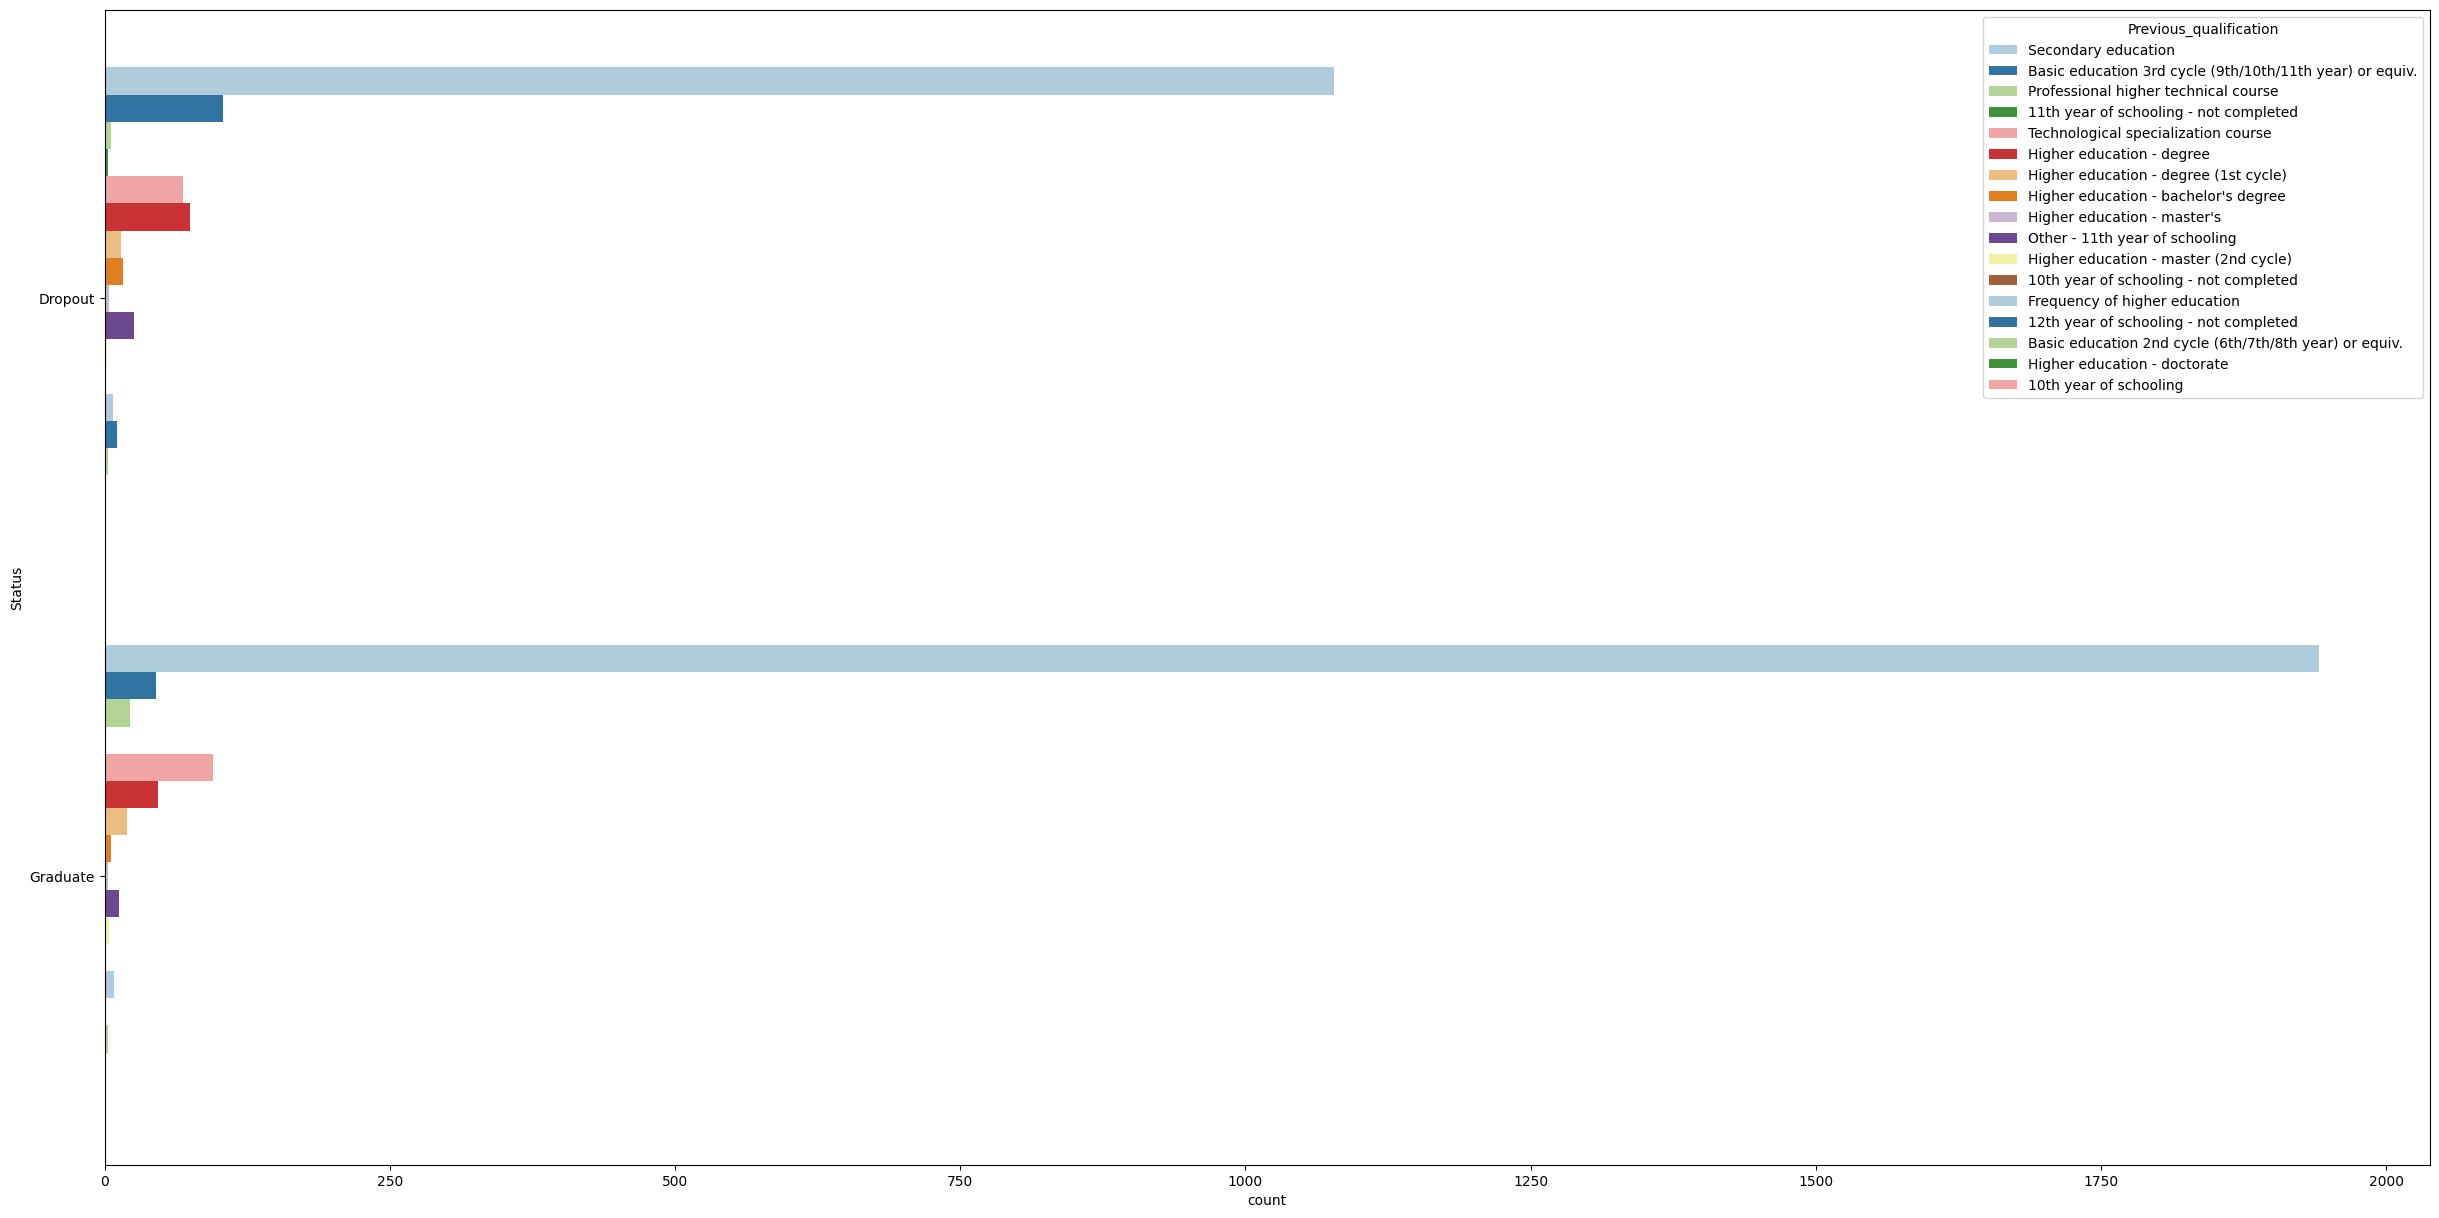

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[3], palette='Paired')

<Axes: xlabel='count', ylabel='Status'>

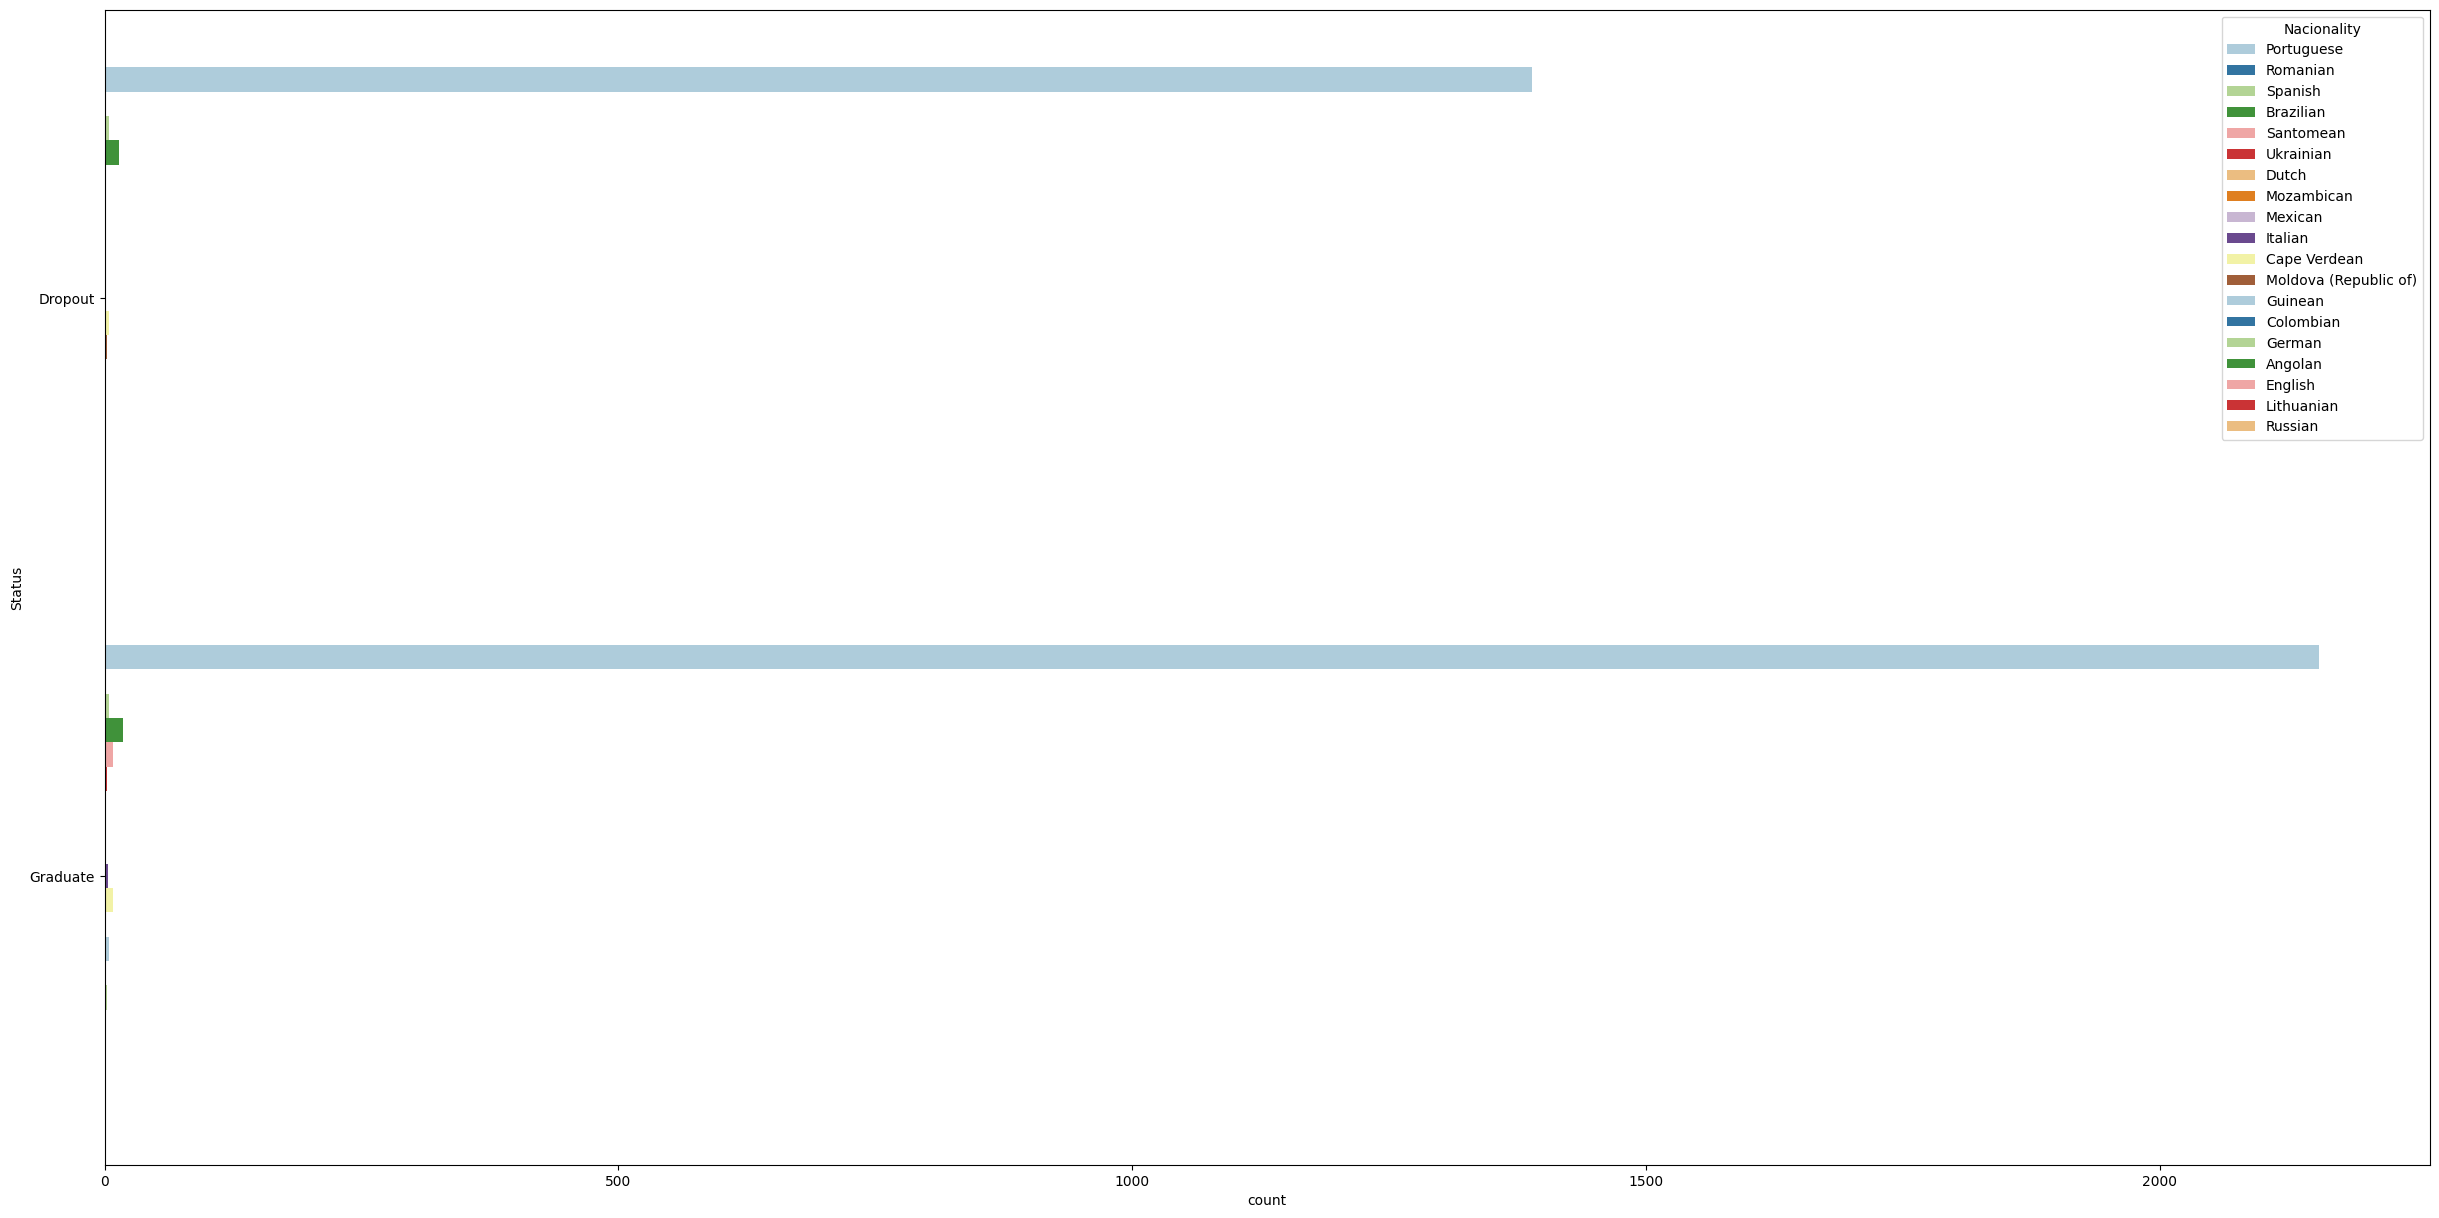

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[4], palette='Paired')

<Axes: xlabel='count', ylabel='Status'>

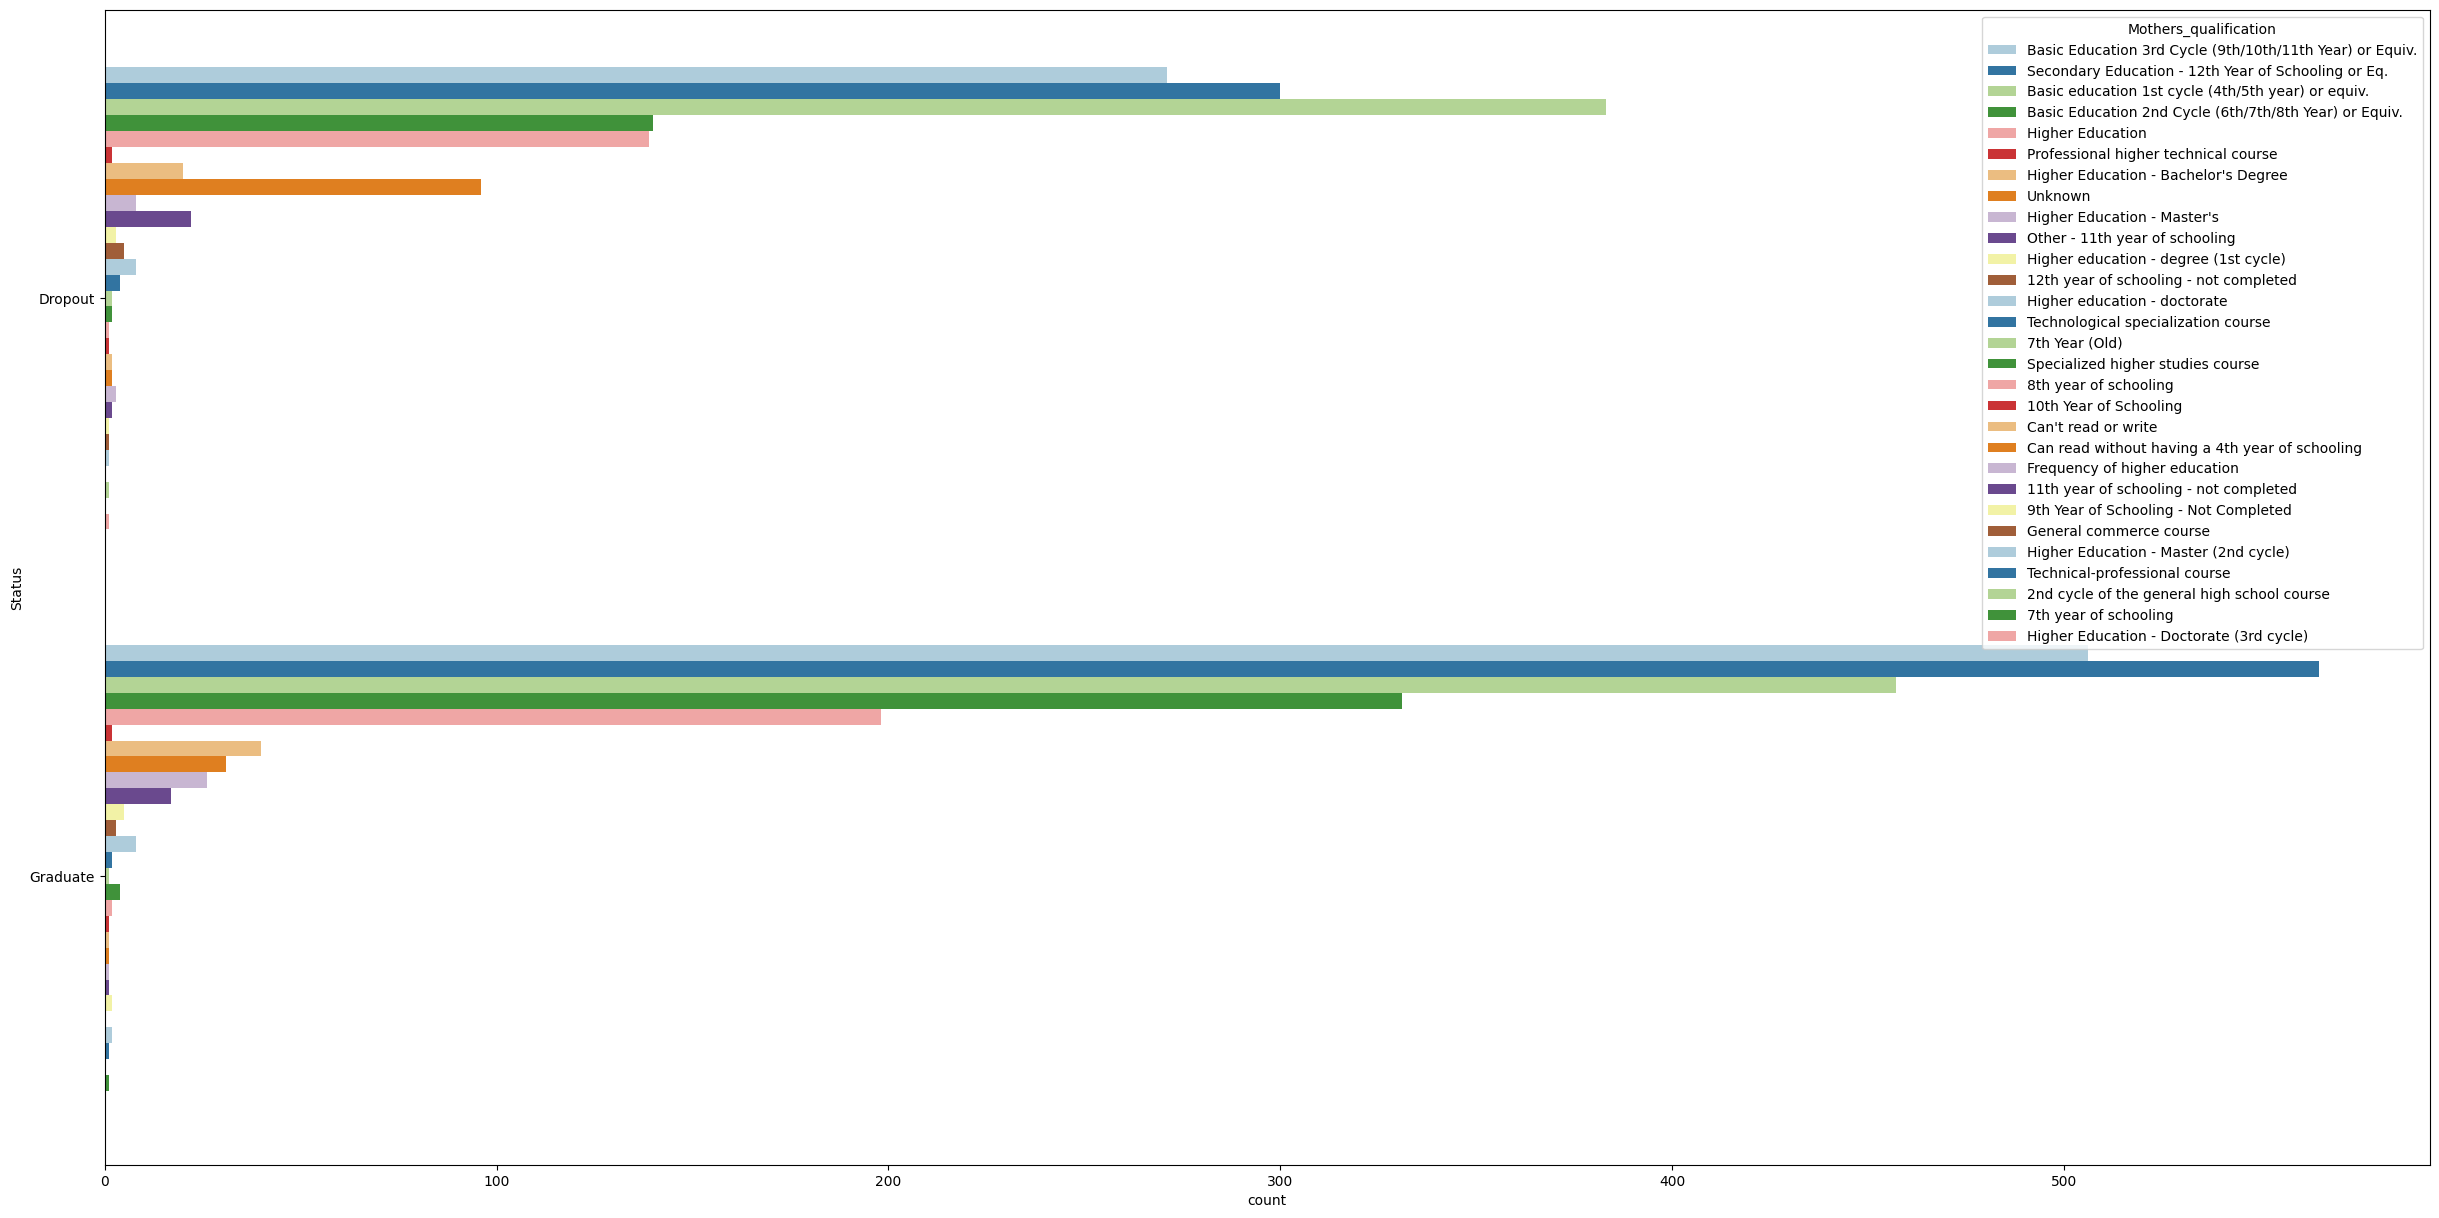

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[5], palette='Paired')

<Axes: xlabel='count', ylabel='Status'>

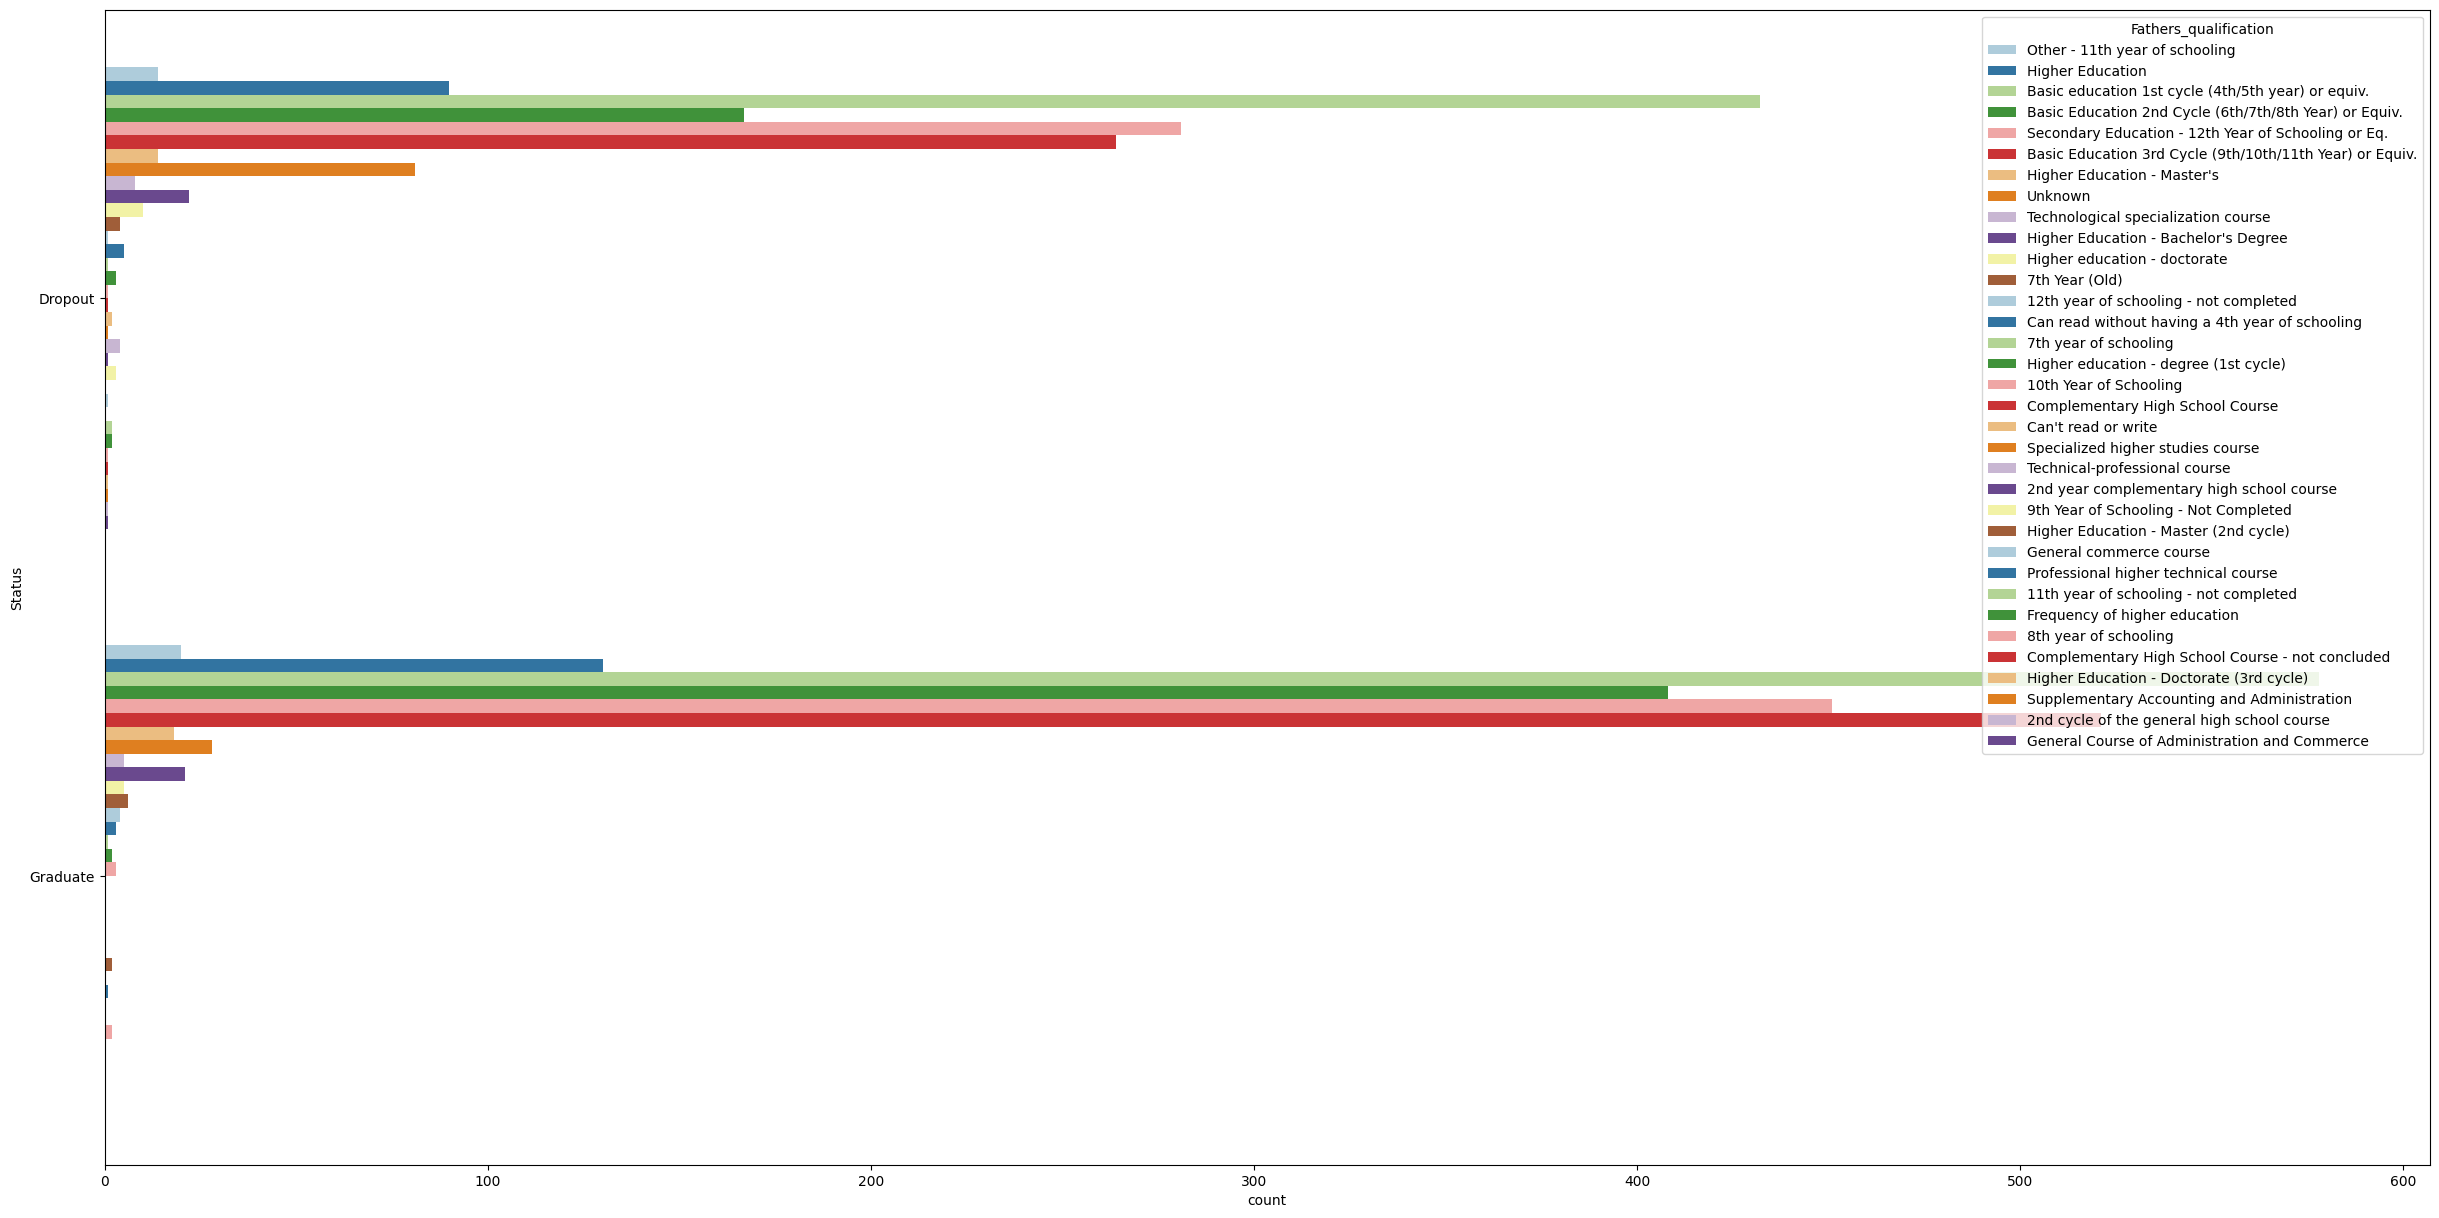

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[6], palette='Paired')

<Axes: xlabel='count', ylabel='Status'>

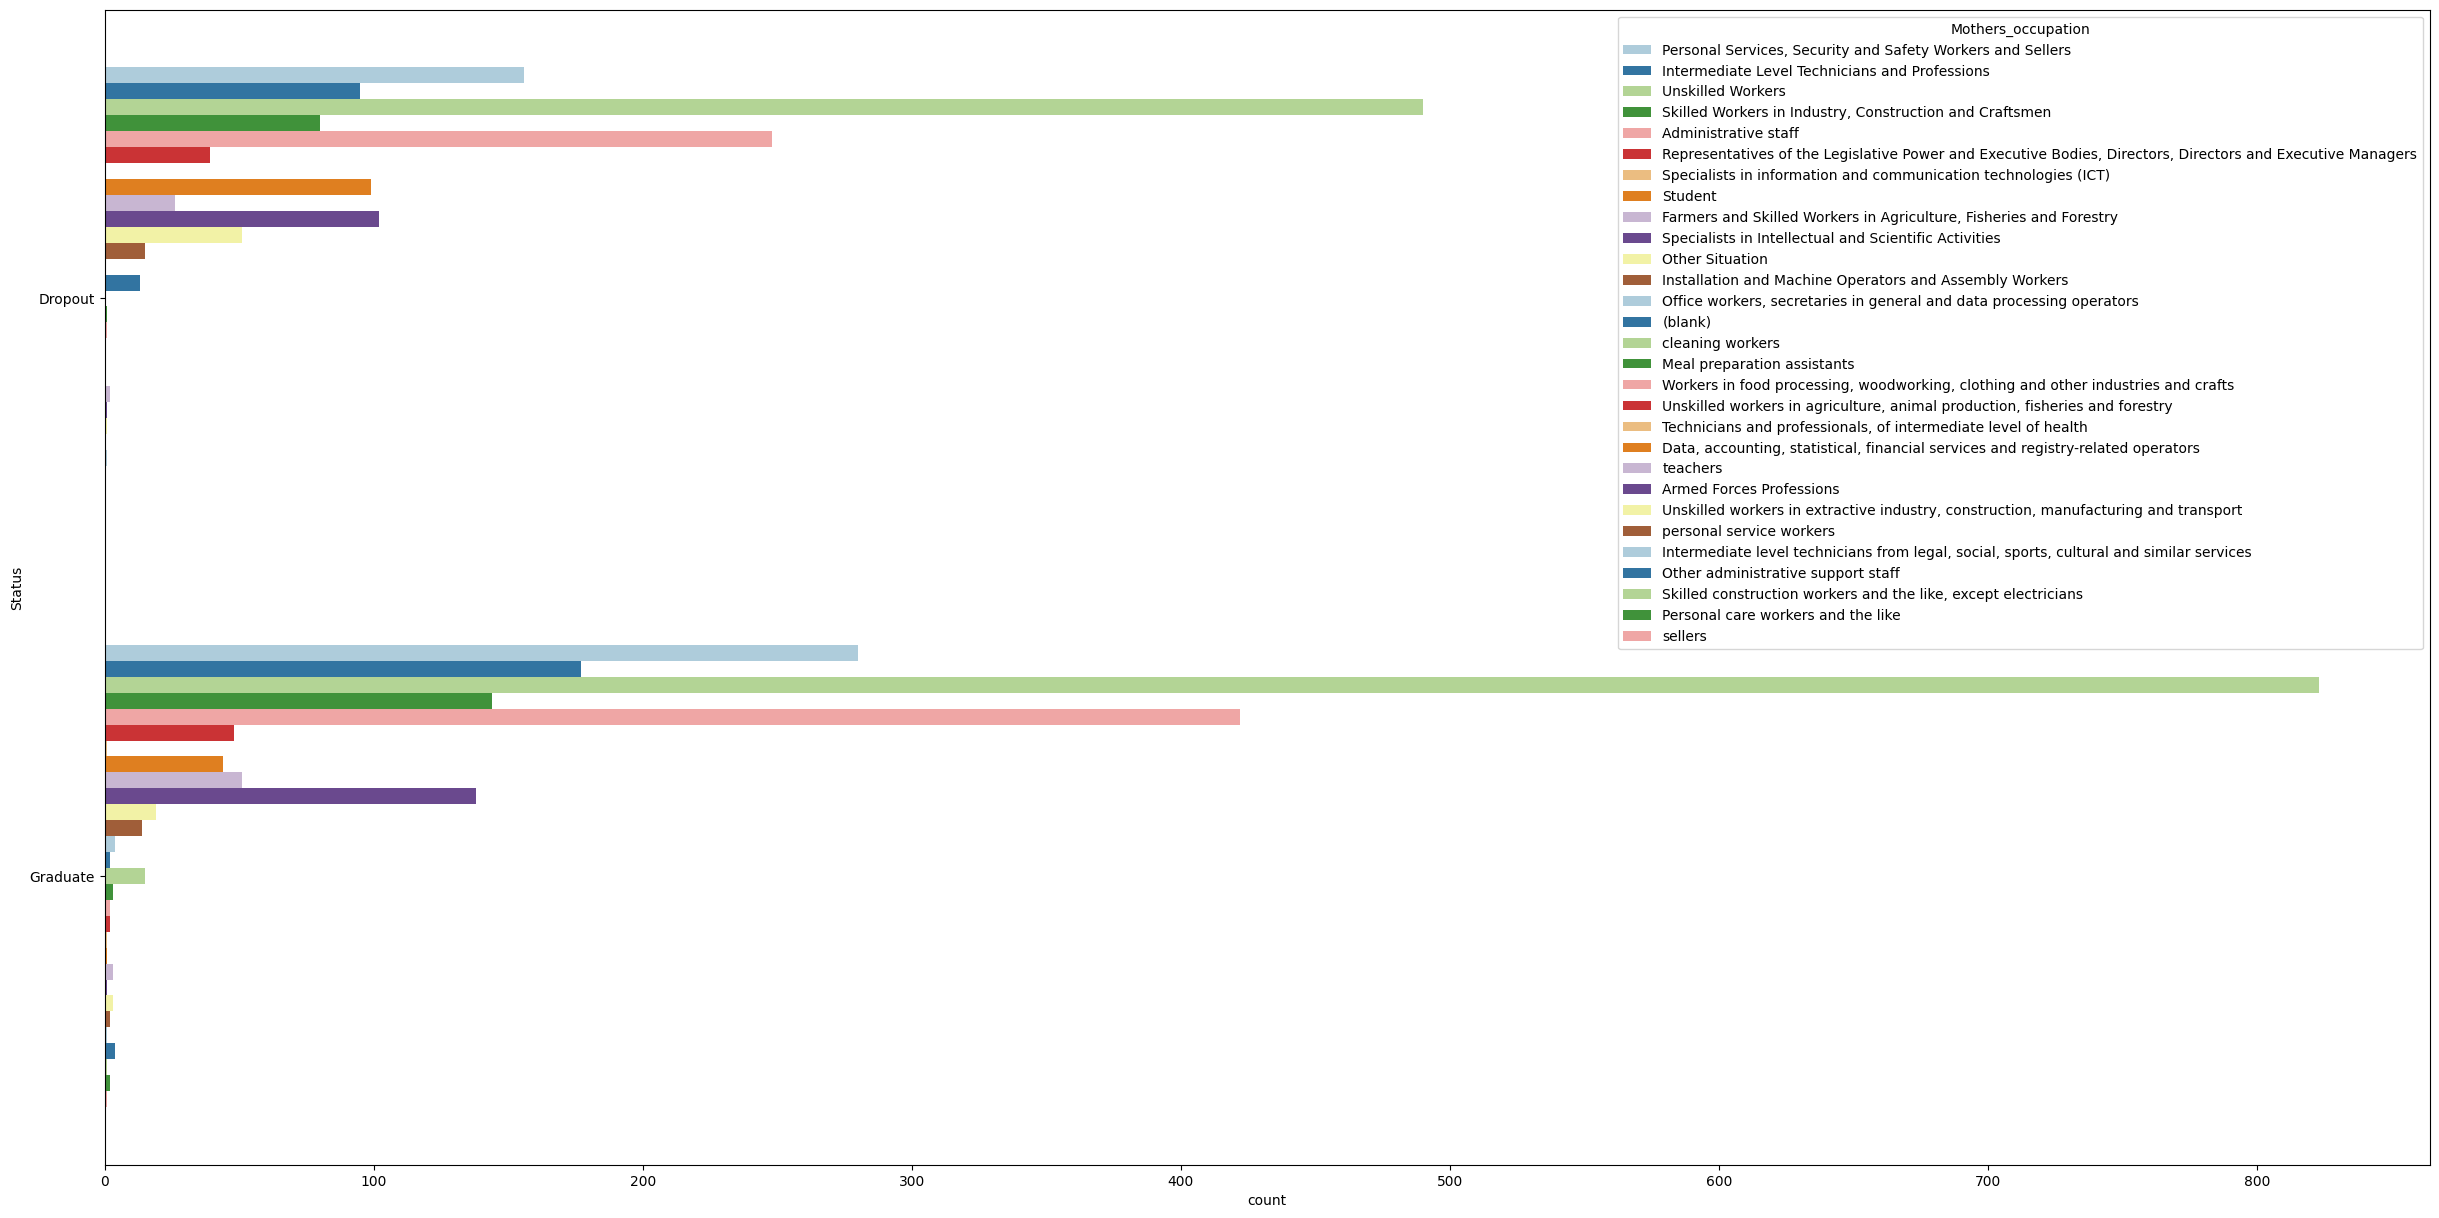

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[7], palette='Paired')

<Axes: xlabel='count', ylabel='Status'>

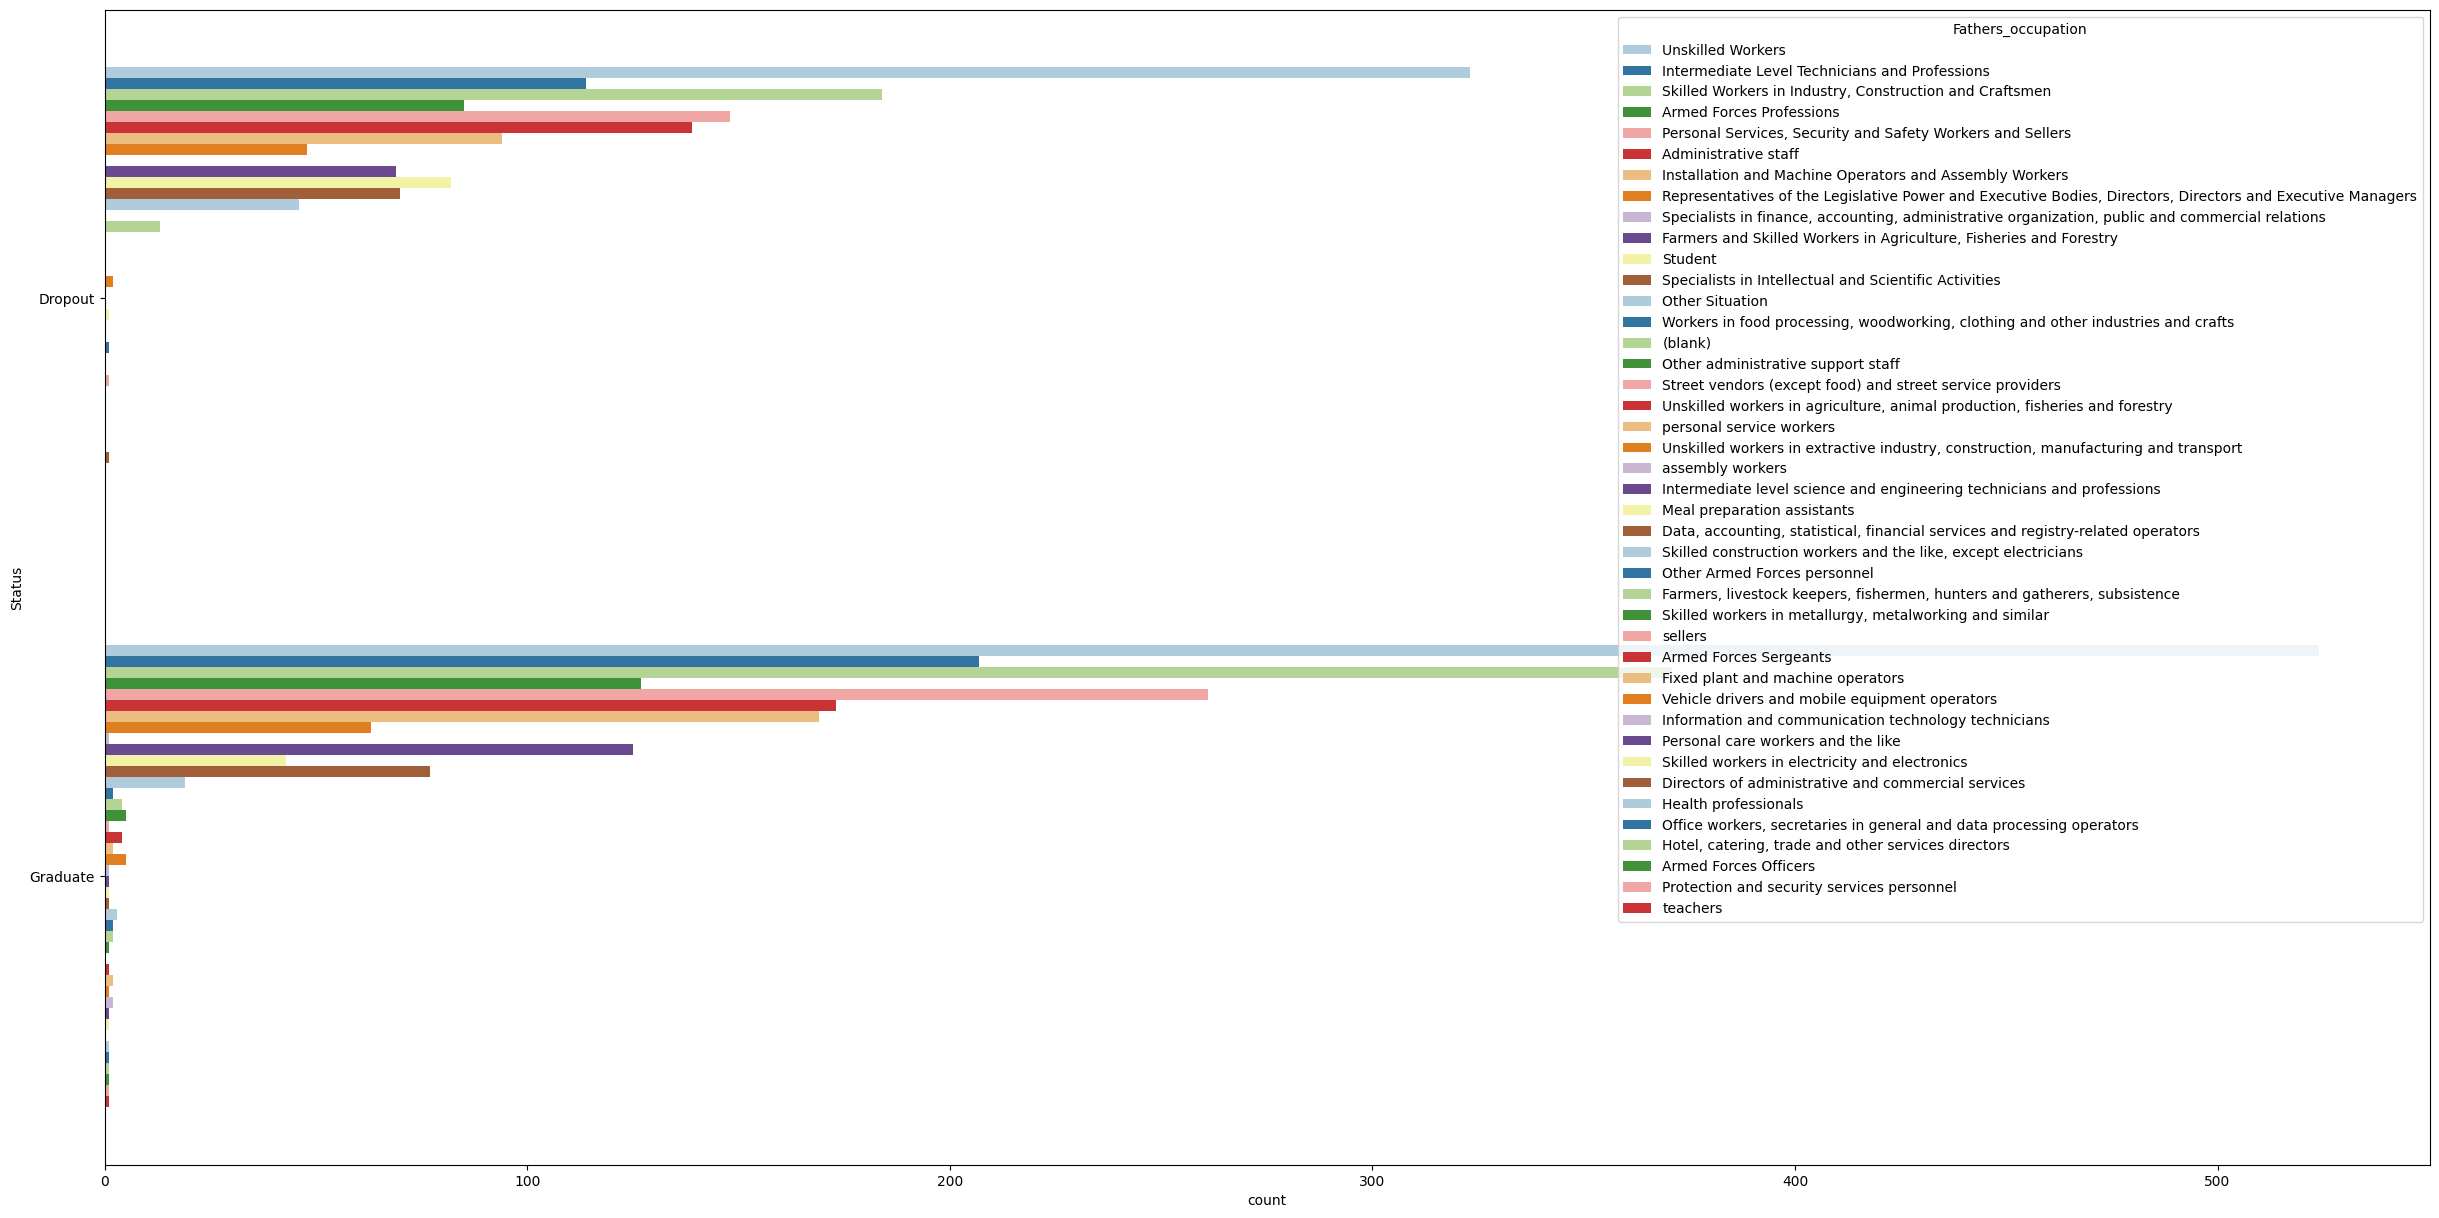

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(data=eda_df, y='Status', hue=categorical[8], palette='Paired')

- Tidak terdapat pola yang menarik pada fitur marital status.
- Siswa yang memilih metode melamar dengan jenis 'memegang program studi lain yang lebih tinggi' dan siswa yang 'berumur 23 tahun keatas' lebih berisiko untuk dropout, dibuktikan pada fitur 'Application mode' yang mana jumlah siswanya lebih banyak yang keluar/dropout daripada yang lulus/graduate.
- Siswa yang mengambil kursus 'Informatics Engineering' lebih memiliki kemungkinan dropout lebih tinggi dibandingkan kemungkinan lulusnya.
- tidak terdapat pola menarik pada fitur previous_qualification.
- tidak terdapat pola menarik pada fitur nationality.
- siswa yang mothers_qualification nya tidak diketahui(unknown) lebih cenderung dropout.
- Siswa yang fathers qualification nya tidak diketahui(unknown) juga cenderung dropout, selain itu dari 4 siswa dengan kualifikasi ayah 'Technical-professional course', belum terdapat siswa yang berhail lulus.
- Siswa yang status pekerjaan ibunya adalah siswa/'Student', lebih banyak yang dropout.
- siswa yang status pekerjaan ayahnya adalah siswa/'Student' juga lebih banyak yang dropout daripada yang lulus.

Oleh karena itu fitur marital status, previous qualification, dan nationality perlu dipertimbangkan untuk tidak diikutsertakan pada analisis kali ini.

#### Distribusi Data Numerical

In [ ]:
numerical = ['Application_order', 'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
             'Curricular_units_1st_sem_enrolled',	'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
             'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited',
             'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
             'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations']

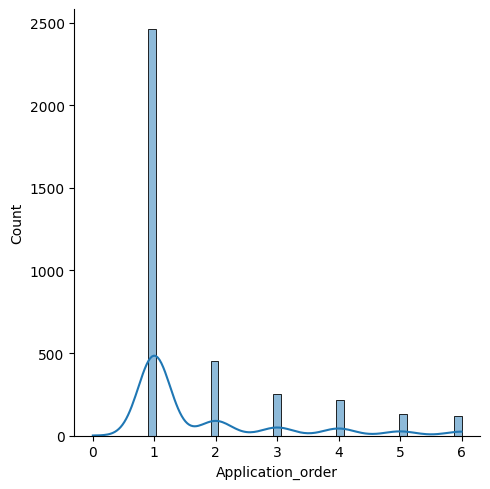

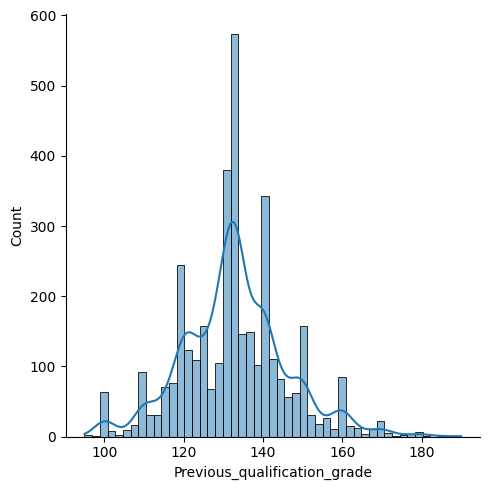

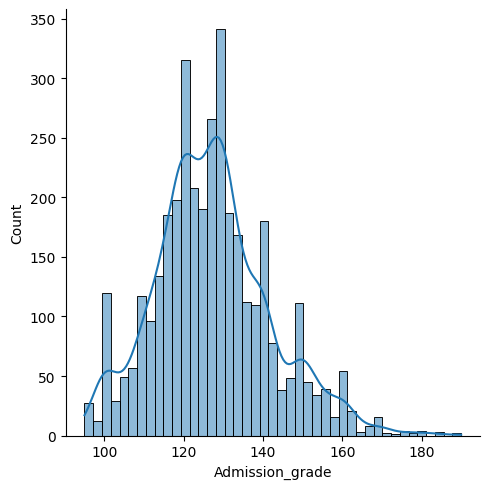

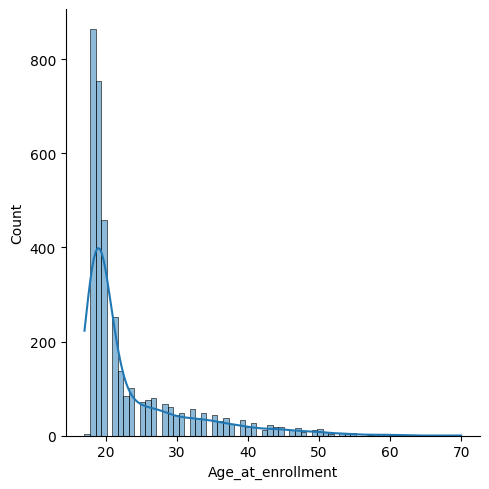

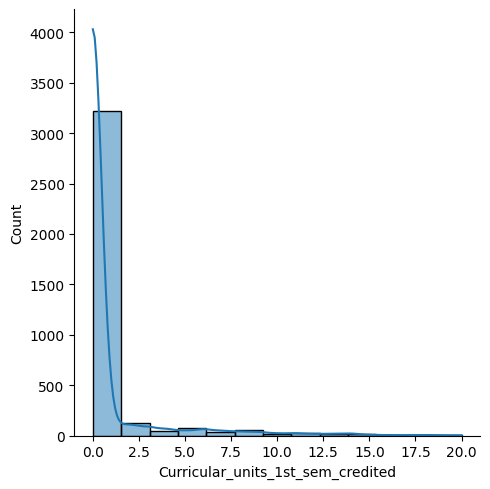

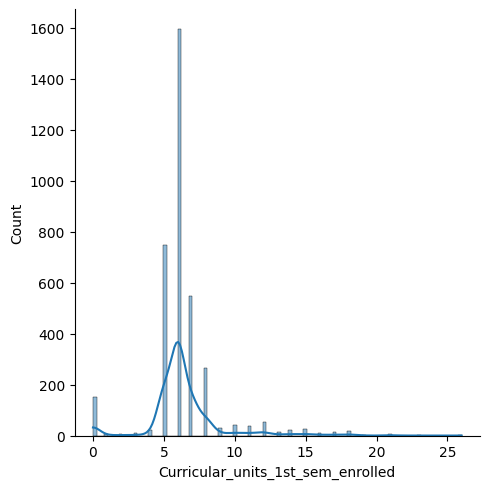

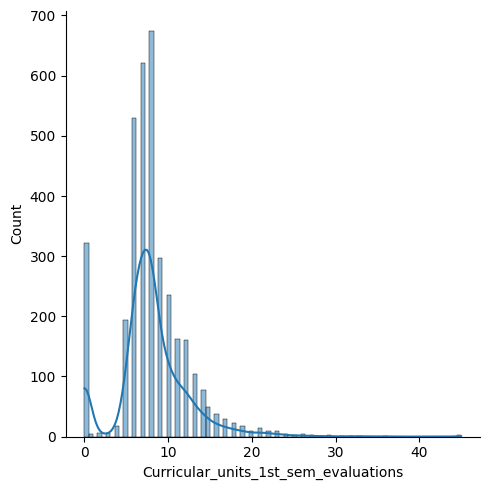

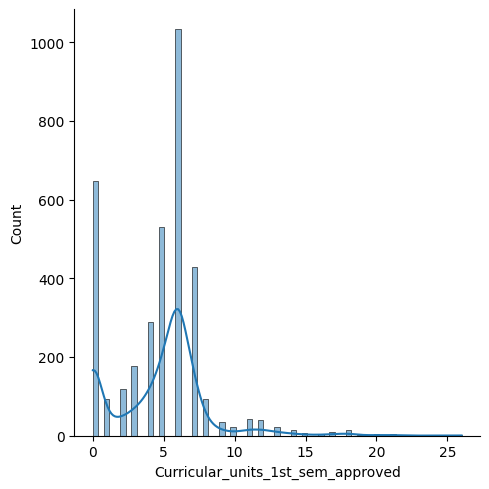

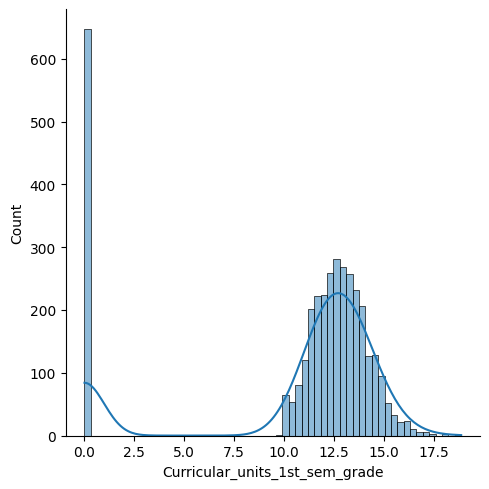

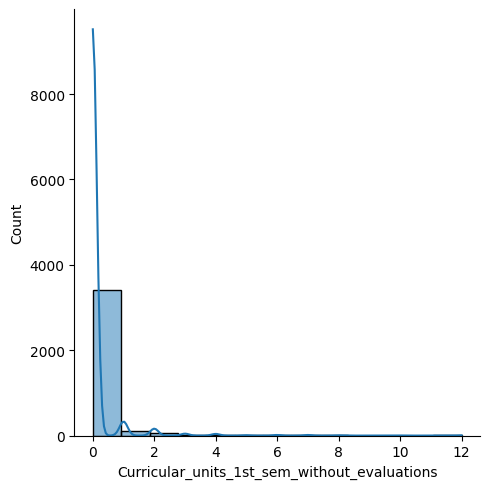

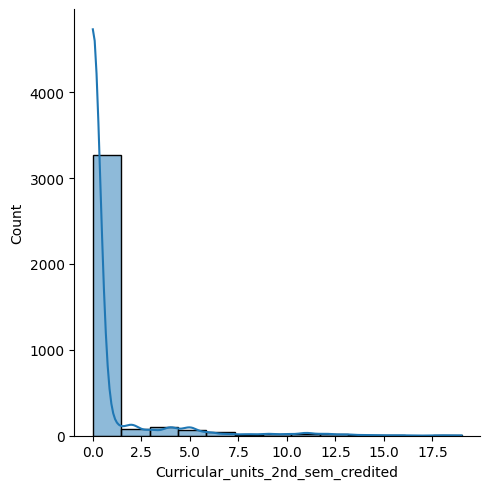

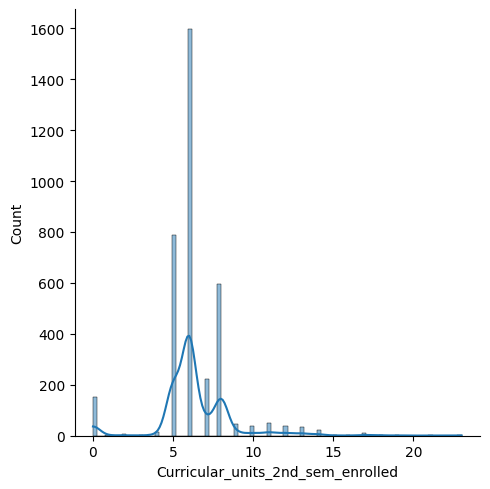

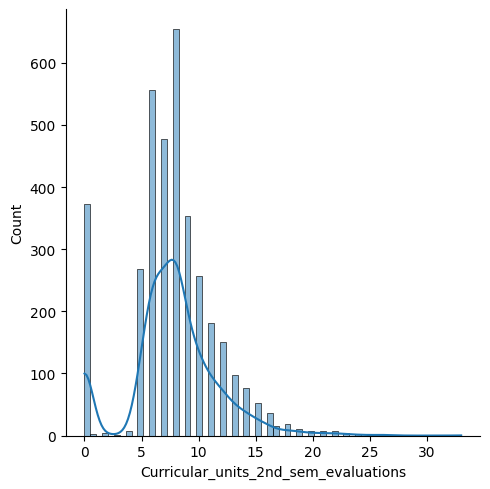

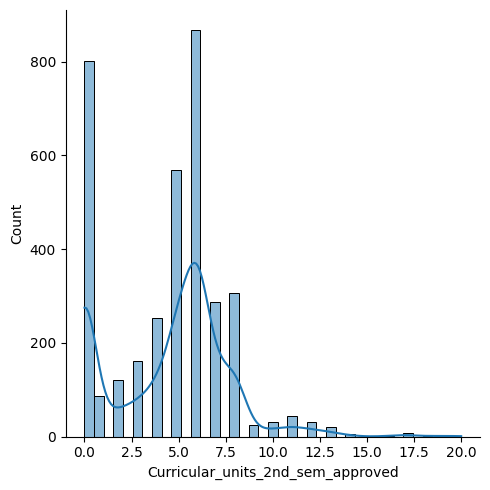

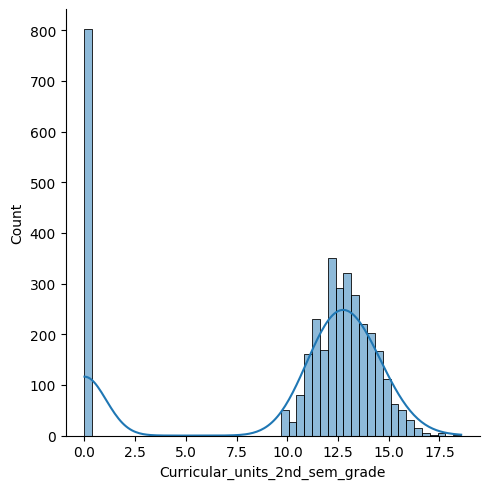

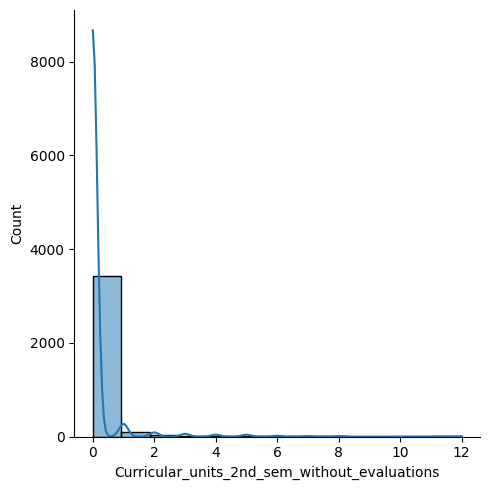

In [ ]:
for i, feature in enumerate(numerical):
  sns.displot(data=eda_df, x=feature, kde='joint')
plt.tight_layout()
plt.show()

Dapat dilihat pada grafik histogram di atas, hanya feature previous_qualification_grade dan admission_grade yang distribusinya mendekati normal, sedangkan feature lain distribusinya skewed/miring ke kanan dan ke kiri. Oleh karena itu akan kita lakukan tahap scaling sebelum datanya digunakan untuk melatih model.

Sekarang kita coba lihat persebaran data yang dikelompokkan berdasarkan status dropoutnya.

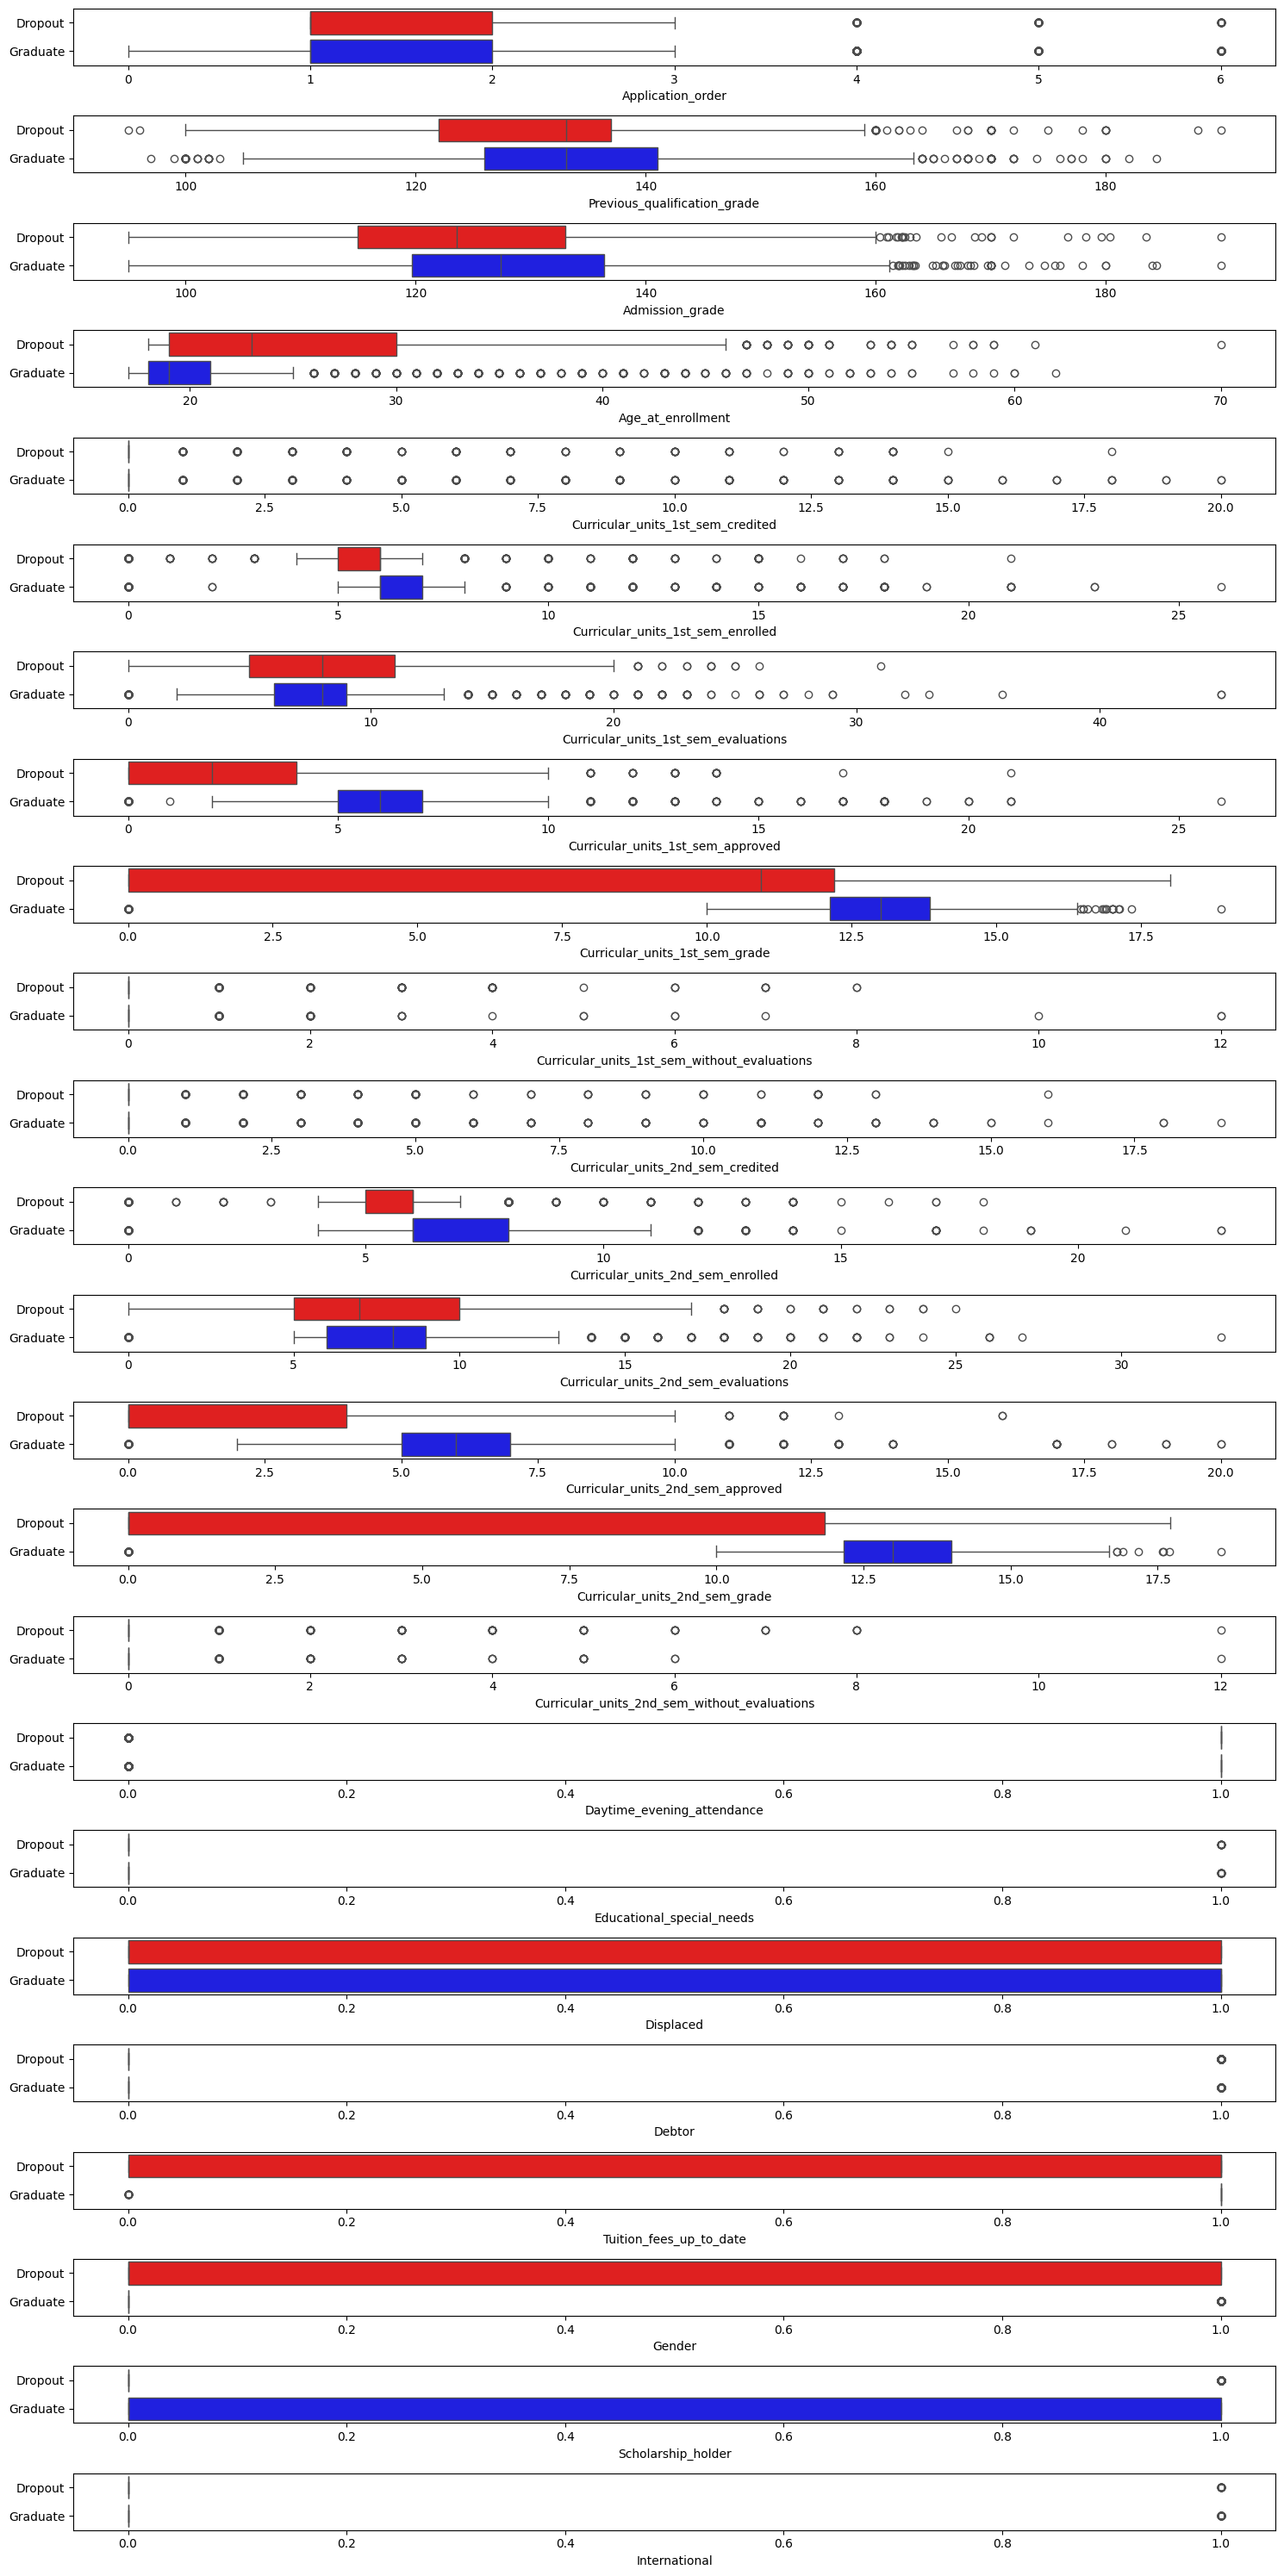

In [ ]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True, palette=['Red', 'Blue']):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(x=feature, y=segment_feature, data=df, hue=segment_feature, palette=palette, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
  features=numerical + bin_cat,
  df=eda_df,
  segment_feature='Status'
)

Dari grafik boxplot diatas, terdapat pola seperti berikut:
- Semakin tua umur siswa saat melakukan pendaftaran, semakin berisiko untuk dropout.
- Siswa yang dropout cenderung memiliki 'curricular units grade' yang rendah baik semester 1 maupun semester 2, ini sejalan dengan 'curricular units approved'.

Untuk feature lainnya belum terlihat pola yang jelas, oleh karena itu akan kita perkuat dengan analisis korelasi.

#### Analisis Korelasi

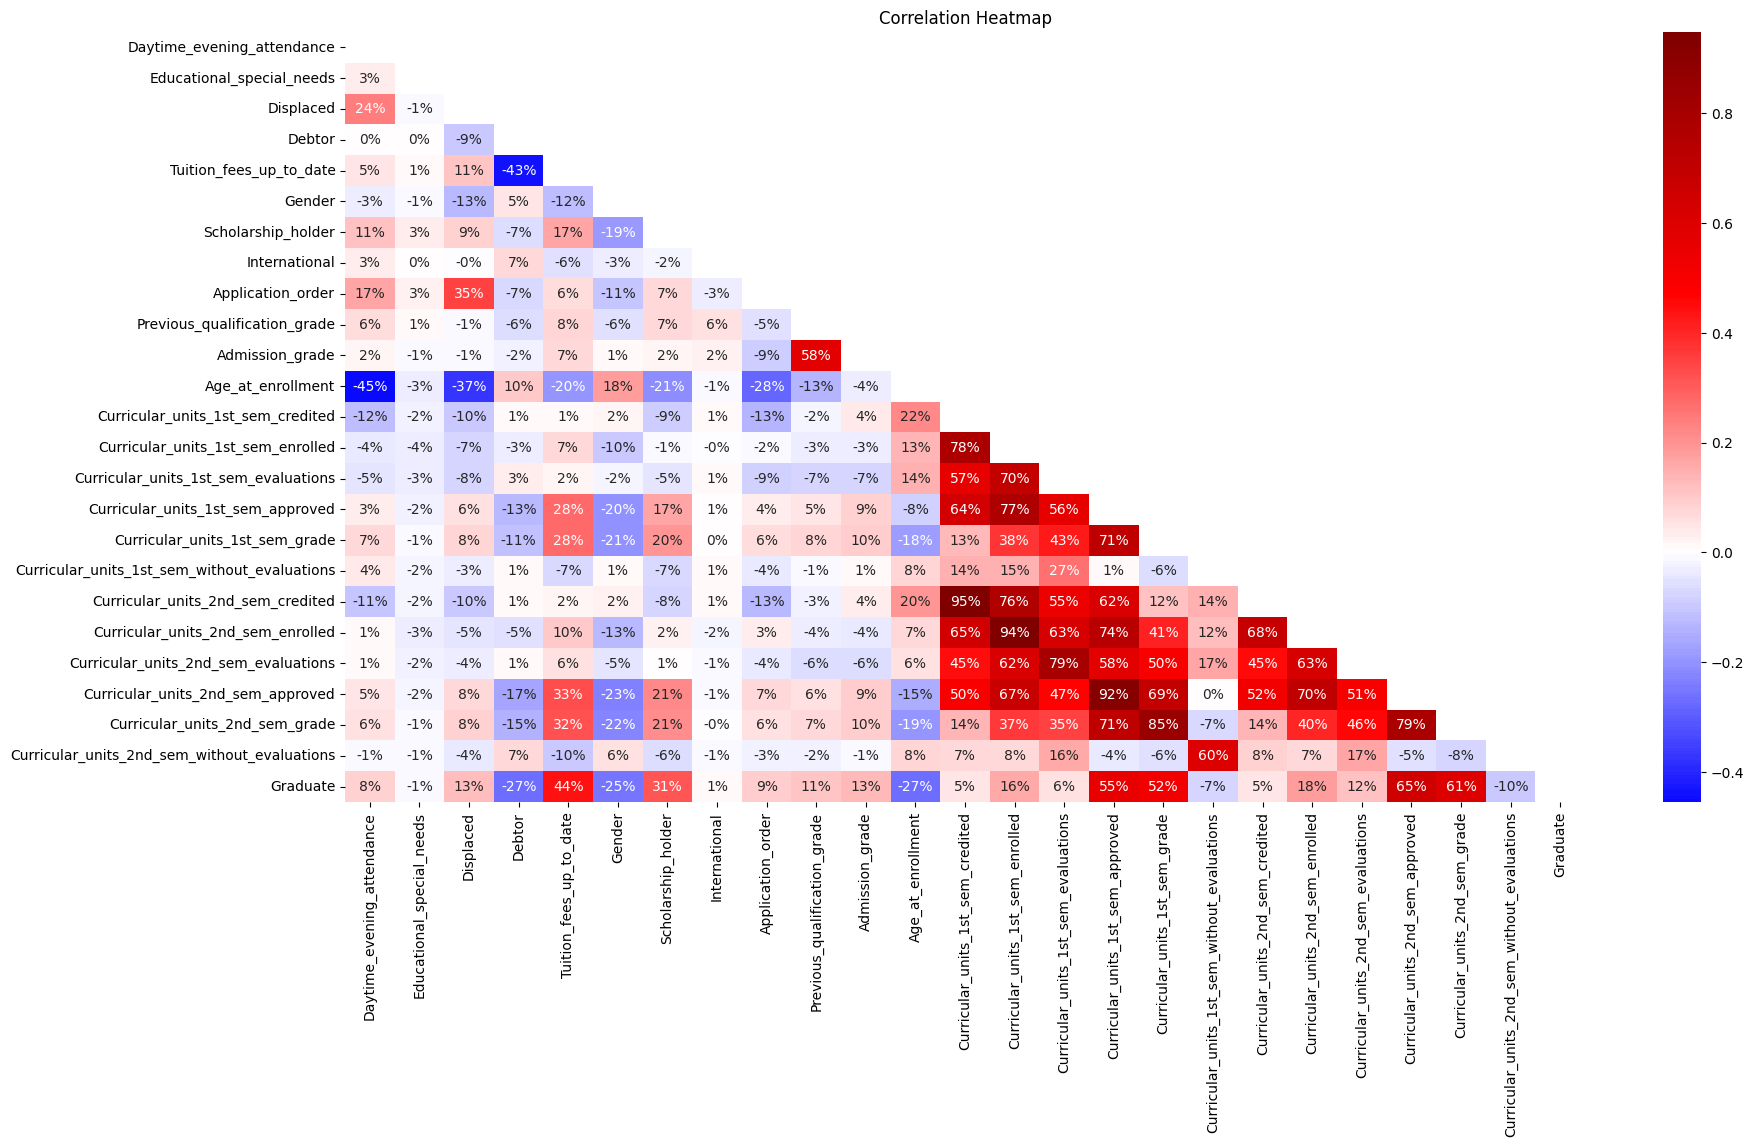

In [ ]:
fig, axe = plt.subplots(figsize=(20,10))
correlation_matrix = eda_df[bin_cat + numerical + ['Graduate']].corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='seismic', center=0, fmt=".0%")
plt.title("Correlation Heatmap")
plt.show()

Namun setelah dilakukan analisis korelasi dengan menggunakan grafik heatmap, terlihat bahwa dari banyaknya feature sebagian besar memiliki nilai korelasi yang sangat rendah terhadap feature 'Graduate', oleh karena itu hanya feature yang memiliki nilai diatas 30%(nilai absolut) yang akan kita gunakan pada analisis kali ini.

Selain itu, terdapat beberapa korelasi yang kuat antar feature/variabel independen, hal ini menunjukkan adanya multikolinearitas pada data, untuk itu pada tahap selanjutnya akan kita lakukan Principal Component Analysis(PCA). Karena kita telah menetapkan batas nilainya diatas 30%(nilai absolute) maka hanya feature Scholarship_holder yang tidak dilakukan proses PCA.

### Save Data Visualisasi

Sebelum melakukan preprocessing pada data yang akan digunakan untuk modeling, kita perlu menyimpan data yang berisi feature-feature yang akan digunakan untuk membuat dashboard visualisasi pada Tableau.

In [ ]:
vis_df = df[['Application_mode', 'Course', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Debtor',
             'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
             'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']]

Untuk mempermudah pada proses visualisasi, kita perlu men-decode pada feature yang memiliki nilai biner dan menyimpannya untuk divisualisasikan pada Tableau, berikut ini link dashboard visualisasi pada Tableau:

In [ ]:
vis_df.replace({'Gender': {0: 'Female', 1: 'Male'},
                          'Debtor': {0: 'No', 1: 'Yes'},
                          'Tuition_fees_up_to_date': {0: 'No', 1: 'Yes'},
                          'Scholarship_holder': {0: 'No', 1: 'Yes'}
                          }, inplace=True)
vis_df.to_csv('vis_df.csv', index=False)

<ipython-input-34-f124d09736bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df.replace({'Gender': {0: 'Female', 1: 'Male'},


## Data Preparation / Preprocessing

In [ ]:
main_df = df[['Application_mode', 'Course', 'Fathers_qualification', 'Mothers_qualification', 'Fathers_occupation', 'Mothers_occupation', 'Scholarship_holder',
             'Tuition_fees_up_to_date', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_approved',
             'Curricular_units_2nd_sem_grade', 'Status']]
main_df.head()

,Application_mode,Course,Fathers_qualification,Mothers_qualification,Fathers_occupation,Mothers_occupation,Scholarship_holder,Tuition_fees_up_to_date,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,2nd phase - general contingent,Animation and Multimedia Design,Other - 11th year of schooling,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,"Personal Services, Security and Safety Workers...",0,1,0,0.000000,0,0.000000,Dropout
1,International student (bachelor),Tourism,Higher Education,Secondary Education - 12th Year of Schooling o...,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,0,0,6,14.000000,6,13.666667,Graduate
2,1st phase - general contingent,Communication Design,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,0,0,0,0.000000,0,0.000000,Dropout
3,2nd phase - general contingent,Journalism and Communication,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Intermediate Level Technicians and Professions,"Personal Services, Security and Safety Workers...",0,1,6,13.428571,5,12.400000,Graduate
4,Over 23 years old,Social Service (evening attendance),Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,0,1,5,12.333333,6,13.000000,Graduate


Kita perlu menyimpan data 'main_df' untuk digunakan pada streamlit web app untuk memberikan kesempatan kepada user mengeksplorasi data siswa.

In [ ]:
explore_df = main_df.drop(main_df[main_df['Status']=='Enrolled'].index)
explore_df.replace({'Tuition_fees_up_to_date': {0: 'No', 1: 'Yes'},
                    'Scholarship_holder': {0: 'No', 1: 'Yes'}
                    }, inplace=True)
explore_df.to_csv('explore_df.csv', index=False)

### Encoding

Karena kita akan melakukan prediksi dengan menggunakan data yang memiliki status 'Enrolled', dan terdapat beberapa value pada kolom-kolom kategorikal pada data yang berstatus 'Graduate' atau 'Dropout', maka data yang berstatus 'Enrolled' kita ikut sertakan dalam proses Encoding, kemudian kita pisahkan sebelum dilakukan split data.

In [ ]:
encoded_df = main_df.copy()
for feature in encoded_df.columns[:6]:
  encoder = LabelEncoder()
  encoded_df[feature] = encoder.fit_transform(encoded_df[feature])
  joblib.dump(encoder, f'/content/model/{feature}_encoder.joblib')

In [ ]:
main_df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [ ]:
encoded_df.drop(encoded_df[encoded_df['Status']=='Enrolled'].index, inplace=True)

encoded_df['Status'] = y_encoder.transform(encoded_df['Status'])
encoded_df['Status'].value_counts()

Status
1    2209
0    1421
Name: count, dtype: int64

In [ ]:
encoded_df

,Application_mode,Course,Fathers_qualification,Mothers_qualification,Fathers_occupation,Mothers_occupation,Scholarship_holder,Tuition_fees_up_to_date,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,3,2,26,9,37,14,0,1,0,0.000000,0,0.000000,0
1,9,15,19,24,14,7,0,0,6,14.000000,6,13.666667,1
2,0,5,11,10,37,24,0,0,0,0.000000,0,0.000000,0
3,3,8,11,8,14,14,0,1,6,13.428571,5,12.400000,1
4,14,14,9,10,37,24,0,1,5,12.333333,6,13.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,8,28,24,1,14,0,1,5,13.600000,5,12.666667,1
4420,0,8,28,24,37,24,0,0,6,12.000000,2,11.000000,0
4421,0,11,11,10,37,24,1,1,7,14.912500,1,13.500000,0
4422,0,9,11,10,1,17,1,1,5,13.800000,5,12.000000,1


### Split Data

In [ ]:
X = encoded_df.drop('Status', axis=1)
y = encoded_df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape)

(2904, 12) (726, 12)


Data yang telah dibersihkan kita bagi menjadi data train dan data test dengan rasio 80:20 dan diproses secara acak.

### Scaling

In [ ]:
def scaling(features, df, df_test):
    df = df.copy()
    df_test = df_test.copy()
    for feature in features:
      scaler = StandardScaler()
      X = np.asanyarray(df[feature])
      X = X.reshape(-1,1)
      df[feature] = scaler.fit_transform(X)
      joblib.dump(scaler, f'/content/model/{feature}_scaler.joblib')

      X_test = np.asanyarray(df_test[feature])
      X_test = X_test.reshape(-1,1)
      df_test[feature] = scaler.transform(X_test)
    return df, df_test

X_train_scaled, X_test_scaled = scaling(X.columns[6:], X_train, X_test)

### PCA

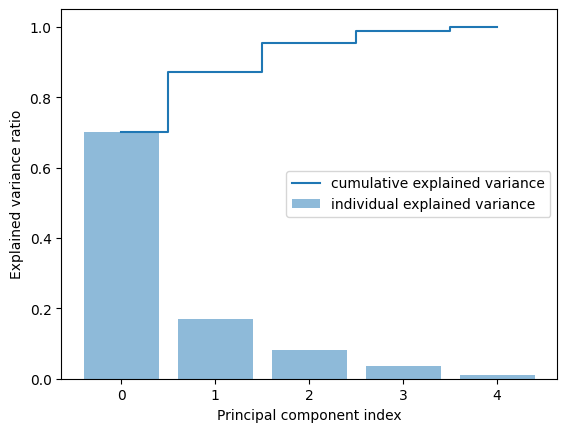

In [ ]:
X_train_pca = X_train_scaled.copy().reset_index(drop=True)

pca = PCA(n_components=len(X_train_scaled.columns[7:]), random_state=42)
pca.fit(X_train_pca[X_train_scaled.columns[7:]])
princ_comp = pca.transform(X_train_pca[X_train_scaled.columns[7:]])

exp_var = pca.explained_variance_ratio_.round(3)
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(len(X_train_scaled.columns[7:])), exp_var, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(X_train_scaled.columns[7:])), cum_exp_var, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Berdasarkan visualisasi di atas, dengan hanya mengambil 3 komponen utama kita telah memperoleh nilai variance sekitar 95%, yang mana bisa mewakili seluruh feature tersebut (5 feature) hanya dengan menggunakan 3 komponen utama.

Kita akan mengganti 5 feature asli pada data dengan 3 komponen utama yang dihasilkan oleh PCA pada data train dan data test.

In [ ]:
pca = PCA(n_components=3, random_state=42)
pca.fit(X_train_pca[X_train_scaled.columns[7:]])
joblib.dump(pca, "/content/model/pca.joblib")
princ_comp = pca.transform(X_train_pca[X_train_scaled.columns[7:]])
X_train_pca[["pca_1", "pca_2", "pca_3"]] = pd.DataFrame(princ_comp, columns=["pca_1", "pca_2", "pca_3"])
X_train_pca.drop(columns=X_train_scaled.columns[7:], axis=1, inplace=True)
X_train_pca.head()

,Application_mode,Course,Fathers_qualification,Mothers_qualification,Fathers_occupation,Mothers_occupation,Scholarship_holder,pca_1,pca_2,pca_3
0,0,5,9,15,37,16,-0.608121,-3.877565,1.605262,0.551382
1,14,1,26,22,37,24,-0.608121,-3.191649,-1.201285,0.541727
2,0,11,10,8,14,7,-0.608121,1.681738,-0.021633,0.194510
3,14,10,11,10,37,24,-0.608121,1.008950,-0.166557,-0.717287
4,14,0,11,10,14,14,-0.608121,-3.191649,-1.201285,0.541727


In [ ]:
X_test_pca = X_test_scaled.copy().reset_index(drop=True)

princ_comp = pca.transform(X_test_pca[X_test_scaled.columns[7:]])
X_test_pca[["pca_1", "pca_2", "pca_3"]] = pd.DataFrame(princ_comp, columns=["pca_1", "pca_2", "pca_3"])
X_test_pca.drop(columns=X_test_scaled.columns[7:], axis=1, inplace=True)
X_test_pca.head()

,Application_mode,Course,Fathers_qualification,Mothers_qualification,Fathers_occupation,Mothers_occupation,Scholarship_holder,pca_1,pca_2,pca_3
0,3,9,10,9,37,24,-0.608121,-0.204481,-0.473851,-0.395995
1,0,8,11,8,14,14,-0.608121,0.201076,2.624825,-0.287705
2,0,12,19,21,26,16,-0.608121,-1.468376,-0.693489,-0.197836
3,6,11,28,9,37,14,1.644409,1.041163,-0.173335,-0.147914
4,8,15,10,9,14,7,-0.608121,-3.191649,-1.201285,0.541727


## Modeling

### Hyperparameter Tuning

Mencari model yang memiliki performa paling unggul dari ketiga algoritma(Random Forest Classifier, Gradient Boosting, dan Support Vector Classifier) dengan parameter yang terbaik.

#### Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 8, 10],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 7],
    'n_estimators': [10, 50, 100]
}

rf_cv = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
rf_cv.fit(X_train_pca, y_train)
rf_cv.best_params_

{'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 100}

In [ ]:
rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=8,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=7,
    n_estimators=100,
)
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=8, max_features=None, min_samples_split=7,
                       random_state=42)

#### Gradient Boosting

In [ ]:
gboost_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 8, 10],
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [None, 'sqrt', 'log2']
}

gboost_cv = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
gboost_cv.fit(X_train_pca, y_train)
gboost_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [ ]:
gboost_model = GradientBoostingClassifier(
    random_state=42,
    learning_rate=0.1,
    max_depth=10,
    max_features='sqrt',
    n_estimators=300
)
gboost_model.fit(X_train_pca, y_train)

GradientBoostingClassifier(max_depth=10, max_features='sqrt', n_estimators=300,
                           random_state=42)

#### Support Vector Classifier

In [ ]:
svc_model = SVC(random_state=42)

param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}
svc_cv = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, n_jobs=-1)
svc_cv.fit(X_train_pca, y_train)
svc_cv.best_params_

{'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
svc_model = SVC(
    random_state=42,
    C=10,
    coef0=0.0,
    degree=2,
    gamma='scale',
    kernel='linear'
)
svc_model.fit(X_train_pca, y_train)

SVC(C=10, degree=2, kernel='linear', random_state=42)

## Evaluation

Evaluasi performa hasil modeling

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluating(model, y_pred, y_true):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Cross Validation Scores:', cv_scores)
    print('Average Cross Validation Scores:', cv_scores.mean(), '\n')

    print(classification_report(y_pred=y_pred, y_true=y_true))

    sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, fmt='d', cmap='seismic')
    plt.yticks([0.5, 1.5], ['Dropout', 'Graduate'], rotation=0)
    plt.xticks([0.5, 1.5], ['Dropout', 'Graduate'], rotation=0)
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

---Random Forest Model---

Cross Validation Scores: [0.89845095 0.89500861 0.90017212 0.90017212 0.88793103]
Average Cross Validation Scores: 0.8963469642115258 

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       277
           1       0.88      0.96      0.91       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



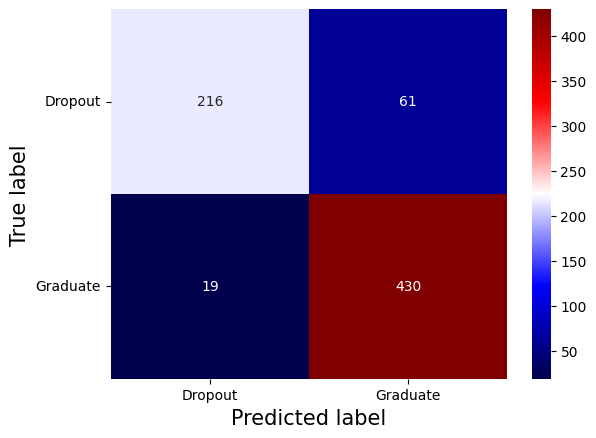

In [ ]:
y_pred = rf_model.predict(X_test_pca)

print('---Random Forest Model---\n')
evaluating(model=rf_model, y_pred=y_pred, y_true=y_test)

---Gradient Boosting Model---

Cross Validation Scores: [0.90361446 0.89156627 0.90361446 0.9070568  0.89137931]
Average Cross Validation Scores: 0.8994462579381566 

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       277
           1       0.88      0.96      0.92       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



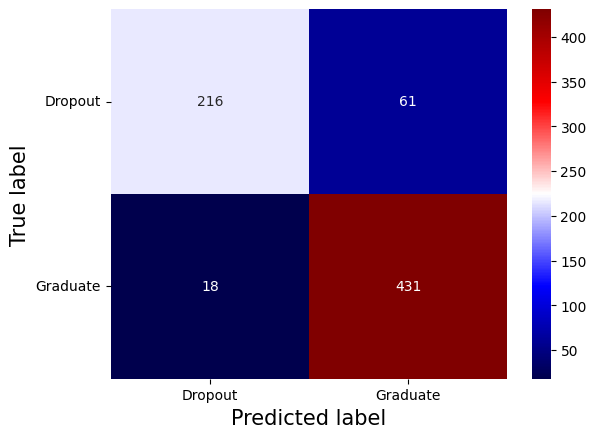

In [ ]:
y_pred = gboost_model.predict(X_test_pca)

print('---Gradient Boosting Model---\n')
evaluating(model=gboost_model, y_pred=y_pred, y_true=y_test)

---SVC model---

Cross Validation Scores: [0.88984509 0.88640275 0.88984509 0.87435456 0.88793103]
Average Cross Validation Scores: 0.885675707757137 

              precision    recall  f1-score   support

           0       0.91      0.74      0.81       277
           1       0.85      0.96      0.90       449

    accuracy                           0.87       726
   macro avg       0.88      0.85      0.86       726
weighted avg       0.88      0.87      0.87       726



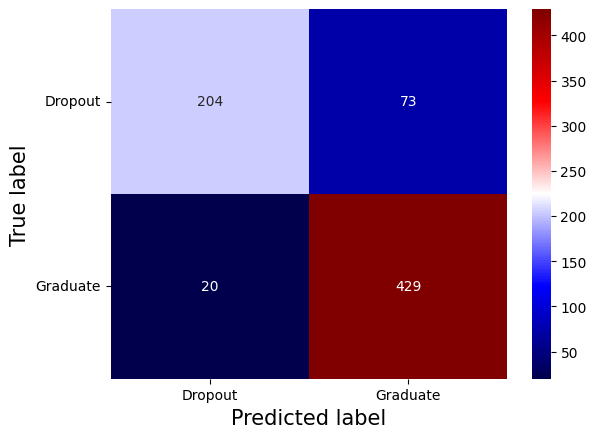

In [ ]:
y_pred = svc_model.predict(X_test_pca)

print('---SVC model---\n')
evaluating(model=svc_model, y_pred=y_pred, y_true=y_test)

Jika kita identifikasi hasil evaluasi diatas:

Dari jumlah data yang berhasil diprediksi dengan benar, model yang menggunakan algoritma Random Forest Classifier memiliki performa yang lebih bagus dalam memprediksi siswa yang 'Graduate'/lulus, dan model yang menggunakan algoritma Gradient Boosting memiliki performa yang lebih bagus dalam memprediksi siswa yang 'Dropout'/keluar, sedangkan model yang menggunakan algoritma SVM lebih cenderung memprediksi ke arah graduate.

Maka dapat kita simpulkan bahwa model yang akan kita gunakan adalah model dengan algoritma Gradient Boosting, karena sesuai dengan tujuan proyek ini yang mana memiliki performa paling baik dalam memprediksi siswa yang Droppout.

### Save Model

In [ ]:
joblib.dump(gboost_model, "/content/model/model.joblib")

['/content/model/model.joblib']

### Load Model

Sebelum model kita deploy, kita perlu mengecek apakah model yang telah kita simpan dapat berfungsi dengan baik.

In [ ]:
loaded_model = joblib.load('/content/model/model.joblib')
loaded_pca = joblib.load('/content/model/pca.joblib')

In [ ]:
last_row = X.iloc[[-1]]
expect = y.iloc[-1]
print('expectation:', y_encoder.inverse_transform(expect.reshape(1,)))
last_row

expectation: ['Graduate']


,Application_mode,Course,Fathers_qualification,Mothers_qualification,Fathers_occupation,Mothers_occupation,Scholarship_holder,Tuition_fees_up_to_date,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade
4423,13,8,11,8,37,14,0,1,6,11.666667,6,13.0


In [ ]:
loaded_scaler = {}
for feature in X.columns[6:]:
  loaded_scaler[f'{feature}_scaler'] = joblib.load(f'/content/model/{feature}_scaler.joblib')
  X_lastrow = np.asanyarray(last_row[feature])
  X_lastrow = X_lastrow.reshape(-1,1)
  last_row[feature] = loaded_scaler[f'{feature}_scaler'].transform(X_lastrow)

<ipython-input-59-82de7a86c3e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row[feature] = loaded_scaler[f'{feature}_scaler'].transform(X_lastrow)
<ipython-input-59-82de7a86c3e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row[feature] = loaded_scaler[f'{feature}_scaler'].transform(X_lastrow)
<ipython-input-59-82de7a86c3e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
lastrow_pca = last_row.copy().reset_index(drop=True)

principal = loaded_pca.transform(lastrow_pca[X.columns[7:]])
lastrow_pca[["pca_1", "pca_2", "pca_3"]] = pd.DataFrame(principal, columns=["pca_1", "pca_2", "pca_3"])
lastrow_pca.drop(columns=X.columns[7:], axis=1, inplace=True)

In [ ]:
predicted = loaded_model.predict(lastrow_pca)
print('Predict:', y_encoder.inverse_transform(predicted))

Predict: ['Graduate']


### Predict

Seperti yang kita bahas sebelumnya kita akan coba lakukan prediksi terhadap data yang berstatus 'Enrolled' dengan model yang telah dilatih dan disimpan.

In [ ]:
enrolled_df = df[X.columns]
enrolled_df['Status'] = df['Status']
enrolled_df = enrolled_df[enrolled_df.Status == 'Enrolled']
enrolled_df.drop('Status', axis=1, inplace=True)

<ipython-input-62-f85f67dae60a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrolled_df['Status'] = df['Status']


Sebelumnya, kita lakukan data preprocessing yang sama seperti model terlebih dahulu.

#### preprocessing

In [ ]:
loaded_encoder = {}
enrolled_encoded = enrolled_df.copy()
for feature in X.columns[:6]:
  loaded_encoder[f'{feature}_encoder'] = joblib.load(f'/content/model/{feature}_encoder.joblib')
  enrolled_encoded[feature] = loaded_encoder[f'{feature}_encoder'].transform(enrolled_df[feature])

loaded_scaler = {}
enrolled_scaled = enrolled_encoded.copy()
for feature in X.columns[6:]:
  loaded_scaler[f'{feature}_scaler'] = joblib.load(f'/content/model/{feature}_scaler.joblib')
  X_enrolled = np.asanyarray(enrolled_df[feature])
  X_enrolled = X_enrolled.reshape(-1,1)
  enrolled_scaled[feature] = loaded_scaler[f'{feature}_scaler'].transform(X_enrolled)
enrolled_scaled.head()

,Application_mode,Course,Fathers_qualification,Mothers_qualification,Fathers_occupation,Mothers_occupation,Scholarship_holder,Tuition_fees_up_to_date,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade
16,4,13,9,9,13,14,-0.608121,0.401417,-1.171723,0.296149,-0.786421,0.187739
19,0,3,10,9,27,17,-0.608121,0.401417,0.389857,0.230378,0.485341,0.641001
21,4,12,9,24,27,1,-0.608121,0.401417,0.702173,0.185160,1.121222,0.264794
25,0,13,9,9,37,24,1.644409,0.401417,0.077541,0.217224,-0.150540,0.187739
27,0,16,10,9,14,7,-0.608121,0.401417,0.077541,0.427692,-0.150540,0.550349


In [ ]:
loaded_pca = joblib.load('/content/model/pca.joblib')

enrolled_pca = enrolled_scaled.copy().reset_index(drop=True)
principalc = loaded_pca.transform(enrolled_pca[X.columns[7:]])
enrolled_pca[["pca_1", "pca_2", "pca_3"]] = pd.DataFrame(principalc, columns=["pca_1", "pca_2", "pca_3"])
enrolled_pca.drop(columns=X.columns[7:], axis=1, inplace=True)
enrolled_pca.head()

,Application_mode,Course,Fathers_qualification,Mothers_qualification,Fathers_occupation,Mothers_occupation,Scholarship_holder,pca_1,pca_2,pca_3
0,4,13,9,9,13,14,-0.608121,-0.633430,-0.574423,-1.224283
1,0,3,10,9,27,17,-0.608121,0.947434,-0.192461,0.022081
2,4,12,9,24,27,1,-0.608121,1.210106,-0.131592,0.660391
3,0,13,9,9,37,24,1.644409,0.252148,-0.343582,-0.236013
4,0,16,10,9,14,7,-0.608121,0.528481,-0.278762,-0.510727


In [ ]:
enrolled_pca.isnull().sum()

Application_mode         0
Course                   0
Fathers_qualification    0
Mothers_qualification    0
Fathers_occupation       0
Mothers_occupation       0
Scholarship_holder       0
pca_1                    0
pca_2                    0
pca_3                    0
dtype: int64

#### Prediction

In [ ]:
enrolled_predict = loaded_model.predict(enrolled_pca)
enrolled_predicted = y_encoder.inverse_transform(enrolled_predict)
enrolled_df['Status'] = enrolled_predicted

enrolled_df.replace({'Tuition_fees_up_to_date': {0: 'No', 1: 'Yes'},
                     'Scholarship_holder': {0: 'No', 1: 'Yes'}
                    }, inplace=True)
enrolled_df.to_csv('enrolled_df.csv', index=False)
enrolled_df.head()

,Application_mode,Course,Fathers_qualification,Mothers_qualification,Fathers_occupation,Mothers_occupation,Scholarship_holder,Tuition_fees_up_to_date,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
16,3rd phase - general contingent,Social Service,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Installation and Machine Operators and Assembl...,"Personal Services, Security and Safety Workers...",No,Yes,1,12.000000,2,11.000,Dropout
19,1st phase - general contingent,Basic Education,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic Education 3rd Cycle (9th/10th/11th Year)...,"Skilled Workers in Industry, Construction and ...","Skilled Workers in Industry, Construction and ...",No,Yes,6,11.666667,6,13.500,Graduate
21,3rd phase - general contingent,Oral Hygiene,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Secondary Education - 12th Year of Schooling o...,"Skilled Workers in Industry, Construction and ...",Administrative staff,No,Yes,7,11.437500,8,11.425,Graduate
25,1st phase - general contingent,Social Service,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,Unskilled Workers,Yes,Yes,5,11.600000,4,11.000,Graduate
27,1st phase - general contingent,Veterinary Nursing,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,No,Yes,5,12.666667,4,13.000,Graduate


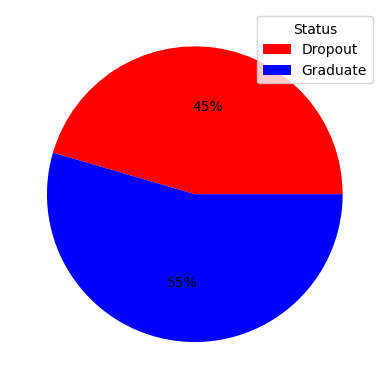

In [ ]:
plt.pie(enrolled_df.groupby('Status').Status.count(), autopct='%.0f%%', colors=['Red', 'Blue'])
plt.legend(['Dropout', 'Graduate'], title='Status')
plt.show()

Dengan menggunakan model yang kita latih, dari keseluruhan siswa yang masih aktif/terdaftar(enrolled), diprediksi sebanyak 55% akan lulus dan 45% nya dropout.

### Download Model

In [ ]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/Curricular_units_2nd_sem_grade_scaler.joblib (deflated 29%)
  adding: content/model/Mothers_occupation_encoder.joblib (deflated 47%)
  adding: content/model/model.joblib (deflated 71%)
  adding: content/model/Curricular_units_2nd_sem_approved_scaler.joblib (deflated 30%)
  adding: content/model/pca.joblib (deflated 35%)
  adding: content/model/Tuition_fees_up_to_date_scaler.joblib (deflated 29%)
  adding: content/model/Fathers_occupation_encoder.joblib (deflated 51%)
  adding: content/model/Scholarship_holder_scaler.joblib (deflated 30%)
  adding: content/model/Fathers_qualification_encoder.joblib (deflated 50%)
  adding: content/model/Curricular_units_1st_sem_grade_scaler.joblib (deflated 30%)
  adding: content/model/Course_encoder.joblib (deflated 35%)
  adding: content/model/Mothers_qualification_encoder.joblib (deflated 47%)
  adding: content/model/y_encoder.joblib (deflated 28%)
  adding: content/model/Curricular_units_1

In [ ]:
from google.colab import files
files.download('/content/model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Feature Importances

<ipython-input-70-b52c3a6100c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=score_df.sort_values(by='Score', ascending=False), palette=('Blues_r'))


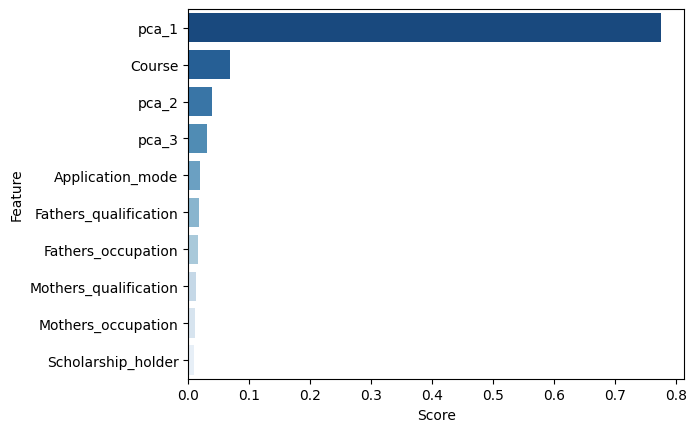

In [ ]:
def feature_importances(model):
  score_list = model.feature_importances_
  feature_list = X_train_pca.columns
  score_df = pd.DataFrame({'Feature': feature_list, 'Score': score_list})
  sns.barplot(x='Score', y='Feature', data=score_df.sort_values(by='Score', ascending=False), palette=('Blues_r'))
  plt.show()

feature_importances(rf_model)